# PDE  Week 13

Intro to PDE

Scipy with PDE

Most of the content of this Jupyter notebook has been taken from http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/._pylight006.html

When there is spatial and temporal dependence, the transient model is often a partial differential equation (PDE). Here we will give a glimse on how to proceed, if you have to solve PDE in your future.

We want to solve equations of the form

$$
\frac{\partial \Psi}{\partial t} = - C \nabla^2 \Psi + V(x,t) 
$$

As this is very complicated and we just want to go over with a simple introduction, let us consider (i) a 1D case (ii) $V(x,t)=g$. 

Therefore our equations looks like (in a very simplied version and with a heat source of $h(x,t)$)

$$
\frac{\partial \Psi}{\partial t} = \alpha \frac{d^2}{dx^2} \Psi + h(x,t)
$$

This is the so called Diffusion Equation, where $\Psi(x,t)$ can be the particle concentration in a liquid or other diffusion process. One very popular application of the diffusion equation is for heat transport in solid bodies. Here, $\Psi$ will correspond to the temperature, and the equation predicts how the temperature evolves in space and time within the solid body. We remark that the temperature in a fluid is influenced not only by diffusion, but also by the flow of the liquid. If present, the latter effect requires an extra term in the equation (known as an advection or convection term). The term g is known as the source term and represents generation, or loss, of heat (by some mechanism) within the body. For diffusive transport, g models injection or extraction of the substance.



## Initial Conditions and Boundary Conditions

The first thing, we need to worry is that the PDE needs to be solved in some given domain (in space and time). Therefore, we need to know the initial conditions and the boundary conditions (the solution is not unique unless we define both). For example for the diffusion equation we need to know the initial condition for the concentration $\Psi(x,0)$, stating what $\Psi$ is when the process starts. In addition, the diffusion equation needs one boundary condition at each point of the boundary within the predefined domain. This condition can either be that $\Psi$ is known or that we know the normal derivative, $\nabla \Psi \cdot \hat{n} = \partial \Psi/\partial \hat{n}$, where $\hat{n}$ denotes an outward unit normal the boundary of the domain.

Let us consider a very simple example of the temperature diffusion on a 1D rod with dimension $L$ (domain is given by $[0,L]$. On one end, we assume that the "rod" is insulating and on the other end, there is asome device that control the temperature of the medium. The temperature control is given by the function $c(t)$, let say at $x=0$. Therefore, we have then that $\Psi(0,t)=c(t)$ and $\partial \Psi(x=L,t)/\partial x = 0$ (no heat flux at $x=L$. 

Matematically, we want to solve

$$
\frac{\partial \Psi}{\partial t} = \alpha \frac{d^2}{dx^2} \Psi + h(x,t), \;\;\; x \in (0,L), \;\; t \in (0,T) \\
\Psi(0,t) = c(t), \;\;\; t \in (0,T)
\\
\frac{\partial \Psi (L,t)}{\partial t} = 0, \;\;\;  t \in (0,T)
\\
\Psi(x,0)=\phi(x), \;\;\; x \in (0,L)
$$




Now, we need to solve these equations, meaning that we need to evolve in time within a grid in space

## Finite Difference Methods

Let start by defining a evenly space grid in real space as $x_0 = 0 < x_1 < x_2 < \cdots < x_N = L$ ($x_{i+1} - x_i = \Delta x$).

Therefore, now we can use finite differences for the spatial dependence part:

$$
\frac{d^2 \Psi}{dx^2} \approx \frac{\Psi(x_{i+1},t) - 2 \Psi(x_i,t) + \Psi(x_{i-1},t)}{\Delta x^2}
$$

and following the notation we have used before, this is equivalent to

$$
\frac{\partial \Psi_i(t)}{\partial t} = \alpha \frac{\Psi_{i+1}(t) - 2 \Psi_i(t) + \Psi_{i-1}(t)}{\Delta x^2} + h_i(t) \;\;\;\;(1)
$$
Now, if you look carefully, here we have and $N-1$ ordinary differential equations, which we know how to solve (see our jupyter ODE notebook). This method, it is called the method of lines.

The only thing missing for this method to work is that we use the initial and boundary conditions we have defined.

$\Psi_i(t=0) = \phi_i$, which provides the initial condition to each equation.

For the boundary condition, we make the following observation, as $\Psi(0,t) = c(t)$, this is equivalent to $d\Psi(0,t)/dt = dc(t)/dt$, therefore $d\Psi_0/dt=dc(t)/dt$ with $\Psi_0(t=0)=c(t=0)$.  We use this equation instead of the approximated one from finite differences. 

The last thing to consider is the boundary at $x=L$. To to that, we make the following approximation (a centered approximation, which has a smaller error than the forward approximation):

$$
\frac{\partial \Psi_N}{dx} \approx \frac{\Psi_{N+1}-\Psi_{N-1}}{2 \Delta x} = 0
$$

In the case that you have other boundary, we can generalize the previouys equations to

$$
\frac{\partial \Psi_N}{dx} \approx \frac{\Psi_{N+1}-\Psi_{N-1}}{2 \Delta x} = \beta \\
\Psi_{N+1} =  2 \Delta x \beta + \Psi_{N-1} 
$$

NOTE: that the previous approximation implies the use of a "ficticious" point outside the domain. Here, we will use equation (1) for $i=N$ with the approximation $\Psi_{N+1} = \Psi_{N-1}$. Therefore we get for the case where it is equal to zero that

$$
\frac{\partial \Psi_N(t)}{\partial t} = \alpha \frac{2 \Psi_{N-1}(t) - 2 \Psi_N(t) }{\Delta x^2} + h_N(t) \;\;\;\;(2)
$$

We can now summarize all set of equations we need to solve:

$$
\frac{d\Psi_0}{dt}=\frac{dc(t)}{dt} \\
\frac{\partial \Psi_i(t)}{\partial t} = \alpha \frac{\Psi_{i+1}(t) - 2 \Psi_i(t) + \Psi_{i-1}(t)}{\Delta x^2} + h_i(t), \;\;\; i=1,\cdots,N-1 \\
\frac{\partial \Psi_N(t)}{\partial t} = \alpha \frac{2 \Psi_{N-1}(t) - 2 \Psi_N(t) }{\Delta x^2} + h_N(t)
\Psi_0(0) = c(0)\\
\Psi)_i(0) = \phi_i \\
$$


Ok Now, let us use this methodology for a small problem.

Let us take

$$
g(x,t)=3(x−L)\\
c(t)=−L(3t+2)\\
\phi(x)=2(x−L)
$$

In [1]:
from numpy import linspace, zeros, asarray
import matplotlib.pyplot as plt

#Useful functions
def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u, t))
    u = zeros((N_t+1, len(U_0)))
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    #Using Forward Euler Scheme
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t


In [2]:
def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[N-1] + 2*dx*dudx(t) -
                           2*u[N]) + g(x[N], t)
    return rhs

def u_exact(x, t):
    return (3*t + 2)*(x - L)

def dudx(t):
    return (3*t + 2)

def s(t):
    return u_exact(0, t)

def dsdt(t):
    return 3*(-L)

def g(x, t):
    return 3*(x-L)

In [3]:
def test_diffusion_exact_linear():
    global beta, dx, L, x  # needed in rhs
    L = 1.5
    beta = 0.5
    N = 4
    x = linspace(0, L, N+1)
    dx = x[1] - x[0]
    u = zeros(N+1)

    U_0 = zeros(N+1)
    U_0[0] = s(0)
    U_0[1:] = u_exact(x[1:], 0)
    dt = 0.1
    print(dt)

    u, t = ode_FE(rhs, U_0, dt, T=1.2)

    tol = 1E-12
    for i in range(0, u.shape[0]):
        diff = abs(u_exact(x, t[i]) - u[i,:]).max()
        assert diff < tol, 'diff=%.16g' % diff
        print('diff=%g at t=%g' % (diff, t[i]))

In [4]:
test_diffusion_exact_linear()

0.1
diff=0 at t=0
diff=4.44089e-16 at t=0.1
diff=2.22045e-16 at t=0.2
diff=2.22045e-16 at t=0.3
diff=4.44089e-16 at t=0.4
diff=4.44089e-16 at t=0.5
diff=8.88178e-16 at t=0.6
diff=8.88178e-16 at t=0.7
diff=8.88178e-16 at t=0.8
diff=8.88178e-16 at t=0.9
diff=2.22045e-16 at t=1
diff=8.88178e-16 at t=1.1
diff=1.77636e-15 at t=1.2


Therefore, for With N=4 we reproduce the linear solution exactly

## Hear conduction in a Rod

Assume that the rod is 100 cm long and made of aluminum alloy 6082. The β parameter equals κ/(ϱc), where κ is the heat conduction coefficient, ϱ is the density, and c is the heat capacity. We can find proper values for these physical quantities in the case of aluminum alloy 6082: ϱ=2.7⋅103 kg/m3, κ=200WmK, c=900JKkg. This results in β=κ/(ϱc)=8.2⋅10−5 m2/s. Preliminary simulations show that we are close to a constant steady state temperature after 1 h, i.e., T=3600 s.

In [6]:
def dudx(t):
    return 0

def s(t):
    return 323

def dsdt(t):
    return 0

def g(x, t):
    return 0

In [7]:
L = 1.0
beta = 8.2E-5
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283


CPU time: 783.6s
0.0
True
0.00034375
True
0.0006875
True
0.00103125
True
0.001375
True
0.0017187499999999998
True
0.0020625
True
0.00240625
True
0.00275
True
0.0030937499999999997
True
0.0034374999999999996
True
0.00378125
True
0.004125
True
0.00446875
True
0.0048125
True
0.005156249999999999
True
0.0055
True
0.00584375
True
0.006187499999999999
True
0.00653125
True
0.006874999999999999
True
0.0072187499999999995
True
0.0075625
True
0.00790625
True
0.00825
True
0.008593749999999999
True
0.0089375
True
0.00928125
True
0.009625
True
0.00996875
True
0.010312499999999999
True
0.010656249999999999
True
0.011
True
0.01134375
True
0.0116875
True
0.012031249999999999
True
0.012374999999999999
True
0.01271875
True
0.0130625
True
0.01340625
True
0.013749999999999998
True
0.014093749999999999
True
0.014437499999999999
True
0.01478125
True
0.015125
True
0.01546875
True
0.0158125
True
0.01615625
True
0.0165
True
0.016843749999999998
True
0.017187499999999998
True
0.017531249999999998
True
0.017875


0.14471874999999998
False
0.14506249999999998
False
0.14540625
False
0.14575
False
0.14609375
False
0.1464375
False
0.14678125
False
0.14712499999999998
False
0.14746874999999998
False
0.14781249999999999
True
0.14815625
False
0.1485
False
0.14884375
False
0.1491875
False
0.14953125
False
0.14987499999999998
False
0.15021874999999998
False
0.1505625
False
0.15090625
False
0.15125
True
0.15159375
False
0.1519375
False
0.15228124999999998
False
0.15262499999999998
False
0.15296875
False
0.1533125
False
0.15365625
False
0.154
False
0.15434375
False
0.15468749999999998
True
0.15503124999999998
False
0.15537499999999999
False
0.15571875
False
0.1560625
False
0.15640625
False
0.15675
False
0.15709375
False
0.15743749999999998
False
0.15778124999999998
False
0.158125
True
0.15846875
False
0.1588125
False
0.15915625
False
0.1595
False
0.15984374999999998
False
0.16018749999999998
False
0.16053125
False
0.160875
False
0.16121875
False
0.1615625
True
0.16190625
False
0.16224999999999998
False
0.

0.28771874999999997
False
0.2880625
False
0.28840625
False
0.28875
True
0.28909375
False
0.28943749999999996
False
0.28978125
False
0.29012499999999997
False
0.29046875
False
0.2908125
False
0.29115625
False
0.2915
False
0.29184374999999996
False
0.2921875
True
0.29253124999999996
False
0.292875
False
0.29321875
False
0.2935625
False
0.29390625
False
0.29424999999999996
False
0.29459375
False
0.29493749999999996
False
0.29528125
False
0.29562499999999997
True
0.29596875
False
0.2963125
False
0.29665625
False
0.297
False
0.29734374999999996
False
0.2976875
False
0.29803124999999997
False
0.298375
False
0.29871875
False
0.2990625
True
0.29940625
False
0.29974999999999996
False
0.30009375
False
0.30043749999999997
False
0.30078125
False
0.301125
False
0.30146875
False
0.3018125
False
0.30215624999999996
False
0.3025
True
0.30284374999999997
False
0.3031875
False
0.30353125
False
0.303875
False
0.30421875
False
0.30456249999999996
False
0.30490625
False
0.30524999999999997
False
0.30559375

0.43209375
False
0.4324375
False
0.43278124999999995
False
0.433125
True
0.43346874999999996
False
0.4338125
False
0.43415624999999997
False
0.4345
False
0.43484375
False
0.43518749999999995
False
0.43553125
False
0.43587499999999996
False
0.43621875
False
0.43656249999999996
True
0.43690625
False
0.43724999999999997
False
0.43759374999999995
False
0.4379375
False
0.43828124999999996
False
0.438625
False
0.43896874999999996
False
0.4393125
False
0.43965624999999997
False
0.43999999999999995
True
0.44034375
False
0.44068749999999995
False
0.44103125
False
0.44137499999999996
False
0.44171875
False
0.44206249999999997
False
0.44240625
False
0.44275
False
0.44309374999999995
False
0.4434375
True
0.44378124999999996
False
0.444125
False
0.44446874999999997
False
0.4448125
False
0.44515625
False
0.44549999999999995
False
0.44584375
False
0.44618749999999996
False
0.44653125
False
0.44687499999999997
True
0.44721875
False
0.4475625
False
0.44790624999999995
False
0.44825
False
0.448593749999

0.5775
True
0.57784375
False
0.5781875
False
0.5785312499999999
False
0.5788749999999999
False
0.57921875
False
0.5795625
False
0.57990625
False
0.5802499999999999
False
0.58059375
False
0.5809375
True
0.58128125
False
0.581625
False
0.5819687499999999
False
0.5823125
False
0.58265625
False
0.583
False
0.5833437499999999
False
0.5836874999999999
False
0.58403125
False
0.584375
True
0.58471875
False
0.5850624999999999
False
0.58540625
False
0.58575
False
0.58609375
False
0.5864375
False
0.5867812499999999
False
0.587125
False
0.58746875
False
0.5878125
True
0.5881562499999999
False
0.5884999999999999
False
0.58884375
False
0.5891875
False
0.58953125
False
0.5898749999999999
False
0.59021875
False
0.5905625
False
0.59090625
False
0.5912499999999999
True
0.5915937499999999
False
0.5919375
False
0.59228125
False
0.592625
False
0.5929687499999999
False
0.5933125
False
0.59365625
False
0.594
False
0.59434375
False
0.5946874999999999
True
0.59503125
False
0.595375
False
0.59571875
False
0.596

0.7266874999999999
False
0.7270312499999999
False
0.727375
False
0.72771875
False
0.7280625
False
0.7284062499999999
False
0.72875
True
0.72909375
False
0.7294375
False
0.7297812499999999
False
0.7301249999999999
False
0.73046875
False
0.7308125
False
0.73115625
False
0.7314999999999999
False
0.7318437499999999
False
0.7321875
True
0.73253125
False
0.7328749999999999
False
0.7332187499999999
False
0.7335625
False
0.73390625
False
0.73425
False
0.7345937499999999
False
0.7349374999999999
False
0.73528125
False
0.735625
True
0.73596875
False
0.7363124999999999
False
0.73665625
False
0.737
False
0.73734375
False
0.7376874999999999
False
0.7380312499999999
False
0.738375
False
0.73871875
False
0.7390625
True
0.7394062499999999
False
0.7397499999999999
False
0.74009375
False
0.7404375
False
0.74078125
False
0.7411249999999999
False
0.74146875
False
0.7418125
False
0.74215625
False
0.7424999999999999
True
0.7428437499999999
False
0.7431875
False
0.74353125
False
0.743875
False
0.744218749999

0.8710625
False
0.8714062499999999
False
0.8717499999999999
False
0.87209375
False
0.8724375
False
0.87278125
False
0.8731249999999999
True
0.8734687499999999
False
0.8738125
False
0.87415625
False
0.8744999999999999
False
0.8748437499999999
False
0.8751874999999999
False
0.87553125
False
0.875875
False
0.8762187499999999
False
0.8765624999999999
True
0.87690625
False
0.87725
False
0.87759375
False
0.8779374999999999
False
0.8782812499999999
False
0.878625
False
0.87896875
False
0.8793124999999999
False
0.8796562499999999
False
0.8799999999999999
True
0.88034375
False
0.8806875
False
0.8810312499999999
False
0.8813749999999999
False
0.88171875
False
0.8820625
False
0.88240625
False
0.8827499999999999
False
0.8830937499999999
False
0.8834375
True
0.88378125
False
0.8841249999999999
False
0.8844687499999999
False
0.8848125
False
0.88515625
False
0.8855
False
0.8858437499999999
False
0.8861874999999999
False
0.88653125
False
0.886875
True
0.88721875
False
0.8875624999999999
False
0.887906

1.01303125
False
1.013375
False
1.01371875
False
1.0140624999999999
True
1.01440625
False
1.01475
False
1.01509375
False
1.0154375
False
1.0157812499999999
False
1.016125
False
1.01646875
False
1.0168125
False
1.01715625
False
1.0174999999999998
True
1.01784375
False
1.0181875
False
1.0185312499999999
False
1.018875
False
1.0192187499999998
False
1.0195625
False
1.01990625
False
1.0202499999999999
False
1.02059375
False
1.0209374999999998
True
1.02128125
False
1.021625
False
1.0219687499999999
False
1.0223125
False
1.02265625
False
1.023
False
1.02334375
False
1.0236874999999999
False
1.02403125
False
1.024375
True
1.02471875
False
1.0250625
False
1.0254062499999999
False
1.02575
False
1.02609375
False
1.0264375
False
1.02678125
False
1.0271249999999998
False
1.02746875
False
1.0278125
True
1.0281562499999999
False
1.0285
False
1.0288437499999998
False
1.0291875
False
1.02953125
False
1.0298749999999999
False
1.03021875
False
1.0305625
False
1.03090625
False
1.03125
True
1.031593749999

1.1673749999999998
False
1.16771875
False
1.1680625
False
1.1684062499999999
False
1.16875
True
1.16909375
False
1.1694375
False
1.16978125
False
1.1701249999999999
False
1.17046875
False
1.1708125
False
1.17115625
False
1.1715
False
1.1718437499999999
False
1.1721875
True
1.17253125
False
1.172875
False
1.17321875
False
1.1735624999999998
False
1.17390625
False
1.17425
False
1.1745937499999999
False
1.1749375
False
1.1752812499999998
False
1.175625
True
1.17596875
False
1.1763124999999999
False
1.17665625
False
1.1769999999999998
False
1.17734375
False
1.1776875
False
1.1780312499999999
False
1.178375
False
1.17871875
False
1.1790625
True
1.17940625
False
1.1797499999999999
False
1.18009375
False
1.1804375
False
1.18078125
False
1.181125
False
1.1814687499999998
False
1.1818125
False
1.18215625
False
1.1824999999999999
True
1.18284375
False
1.1831874999999998
False
1.18353125
False
1.183875
False
1.1842187499999999
False
1.1845625
False
1.1849062499999998
False
1.18525
False
1.1855937

1.31690625
False
1.31725
False
1.31759375
False
1.3179375
False
1.3182812499999998
False
1.318625
False
1.31896875
False
1.3193124999999999
False
1.31965625
False
1.3199999999999998
True
1.32034375
False
1.3206875
False
1.3210312499999999
False
1.321375
False
1.3217187499999998
False
1.3220625
False
1.32240625
False
1.3227499999999999
False
1.32309375
False
1.3234374999999998
True
1.32378125
False
1.324125
False
1.3244687499999999
False
1.3248125
False
1.3251562499999998
False
1.3255
False
1.32584375
False
1.3261874999999999
False
1.32653125
False
1.326875
True
1.32721875
False
1.3275625
False
1.3279062499999998
False
1.32825
False
1.32859375
False
1.3289374999999999
False
1.32928125
False
1.3296249999999998
False
1.32996875
False
1.3303125
True
1.3306562499999999
False
1.331
False
1.3313437499999998
False
1.3316875
False
1.33203125
False
1.3323749999999999
False
1.33271875
False
1.3330624999999998
False
1.33340625
False
1.33375
True
1.3340937499999999
False
1.3344375
False
1.33478125


1.464375
True
1.4647187499999998
False
1.4650625
False
1.46540625
False
1.4657499999999999
False
1.46609375
False
1.4664374999999998
False
1.46678125
False
1.467125
False
1.4674687499999999
False
1.4678125
True
1.4681562499999998
False
1.4685
False
1.46884375
False
1.4691874999999999
False
1.46953125
False
1.4698749999999998
False
1.47021875
False
1.4705625
False
1.4709062499999999
False
1.47125
True
1.4715937499999998
False
1.4719375
False
1.47228125
False
1.4726249999999999
False
1.47296875
False
1.4733125
False
1.47365625
False
1.474
False
1.4743437499999998
False
1.4746875
True
1.47503125
False
1.4753749999999999
False
1.47571875
False
1.4760624999999998
False
1.47640625
False
1.47675
False
1.4770937499999999
False
1.4774375
False
1.4777812499999998
False
1.478125
True
1.47846875
False
1.4788124999999999
False
1.47915625
False
1.4794999999999998
False
1.47984375
False
1.4801875
False
1.4805312499999999
False
1.480875
False
1.4812187499999998
False
1.4815625
True
1.48190625
False
1.

1.60909375
False
1.6094374999999999
False
1.60978125
False
1.6101249999999998
False
1.61046875
False
1.6108125
False
1.6111562499999998
False
1.6115
False
1.6118437499999998
False
1.6121874999999999
True
1.61253125
False
1.6128749999999998
False
1.61321875
False
1.6135625
False
1.6139062499999999
False
1.61425
False
1.6145937499999998
False
1.6149375
False
1.61528125
False
1.6156249999999999
True
1.61596875
False
1.6163124999999998
False
1.61665625
False
1.617
False
1.6173437499999999
False
1.6176875
False
1.6180312499999998
False
1.618375
False
1.61871875
False
1.6190624999999998
True
1.61940625
False
1.6197499999999998
False
1.6200937499999999
False
1.6204375
False
1.6207812499999998
False
1.621125
False
1.62146875
False
1.6218124999999999
False
1.62215625
False
1.6224999999999998
True
1.62284375
False
1.6231875
False
1.6235312499999999
False
1.623875
False
1.6242187499999998
False
1.6245625
False
1.62490625
False
1.6252499999999999
False
1.62559375
False
1.6259374999999998
True
1.62

1.7510625
False
1.7514062499999998
False
1.75175
False
1.75209375
False
1.7524374999999999
False
1.75278125
False
1.7531249999999998
True
1.75346875
False
1.7538125
False
1.7541562499999999
False
1.7545
False
1.7548437499999998
False
1.7551875
False
1.75553125
False
1.7558749999999999
False
1.75621875
False
1.7565624999999998
True
1.75690625
False
1.75725
False
1.7575937499999998
False
1.7579375
False
1.7582812499999998
False
1.7586249999999999
False
1.75896875
False
1.7593124999999998
False
1.75965625
False
1.7599999999999998
True
1.7603437499999999
False
1.7606875
False
1.7610312499999998
False
1.761375
False
1.76171875
False
1.7620624999999999
False
1.76240625
False
1.7627499999999998
False
1.76309375
False
1.7634375
True
1.7637812499999999
False
1.764125
False
1.7644687499999998
False
1.7648125
False
1.76515625
False
1.7654999999999998
False
1.76584375
False
1.7661874999999998
False
1.7665312499999999
False
1.766875
True
1.7672187499999998
False
1.7675625
False
1.7679062499999998
F

1.892
False
1.89234375
False
1.8926874999999999
False
1.89303125
False
1.8933749999999998
False
1.89371875
False
1.8940625
True
1.8944062499999998
False
1.89475
False
1.8950937499999998
False
1.8954374999999999
False
1.89578125
False
1.8961249999999998
False
1.89646875
False
1.8968124999999998
False
1.8971562499999999
False
1.8975
True
1.8978437499999998
False
1.8981875
False
1.8985312499999998
False
1.8988749999999999
False
1.89921875
False
1.8995624999999998
False
1.89990625
False
1.90025
False
1.9005937499999999
False
1.9009375
True
1.9012812499999998
False
1.901625
False
1.90196875
False
1.9023124999999999
False
1.90265625
False
1.9029999999999998
False
1.90334375
False
1.9036875
False
1.9040312499999998
False
1.904375
True
1.9047187499999998
False
1.9050624999999999
False
1.90540625
False
1.9057499999999998
False
1.90609375
False
1.9064374999999998
False
1.9067812499999999
False
1.907125
False
1.9074687499999998
False
1.9078125
True
1.90815625
False
1.9084999999999999
False
1.9088

2.03396875
False
2.0343125
False
2.03465625
False
2.0349999999999997
True
2.03534375
False
2.0356875
False
2.0360312499999997
False
2.036375
False
2.03671875
False
2.0370624999999998
False
2.03740625
False
2.03775
False
2.03809375
False
2.0384374999999997
True
2.03878125
False
2.039125
False
2.0394687499999997
False
2.0398125
False
2.04015625
False
2.0404999999999998
False
2.04084375
False
2.0411875
False
2.04153125
False
2.0418749999999997
True
2.04221875
False
2.0425625
False
2.0429062499999997
False
2.04325
False
2.04359375
False
2.0439374999999997
False
2.04428125
False
2.044625
False
2.04496875
False
2.0453125
True
2.04565625
False
2.046
False
2.0463437499999997
False
2.0466875
False
2.04703125
False
2.0473749999999997
False
2.04771875
False
2.0480625
False
2.0484062499999998
False
2.04875
True
2.04909375
False
2.0494375
False
2.0497812499999997
False
2.050125
False
2.05046875
False
2.0508124999999997
False
2.05115625
False
2.0515
False
2.0518437499999997
False
2.0521875
True
2.05

2.1876249999999997
False
2.18796875
False
2.1883125
False
2.1886562499999997
False
2.189
False
2.18934375
False
2.1896875
True
2.1900312499999997
False
2.190375
False
2.19071875
False
2.1910624999999997
False
2.19140625
False
2.19175
False
2.1920937499999997
False
2.1924375
False
2.19278125
False
2.1931249999999998
True
2.19346875
False
2.1938125
False
2.19415625
False
2.1944999999999997
False
2.19484375
False
2.1951875
False
2.1955312499999997
False
2.195875
False
2.19621875
False
2.1965624999999998
True
2.19690625
False
2.19725
False
2.19759375
False
2.1979374999999997
False
2.19828125
False
2.198625
False
2.1989687499999997
False
2.1993125
False
2.19965625
False
2.1999999999999997
True
2.20034375
False
2.2006875
False
2.2010312499999998
False
2.201375
False
2.20171875
False
2.2020625
False
2.2024062499999997
False
2.20275
False
2.20309375
False
2.2034374999999997
True
2.20378125
False
2.204125
False
2.2044687499999998
False
2.2048125
False
2.20515625
False
2.2055
False
2.20584374999

2.33990625
False
2.3402499999999997
False
2.34059375
False
2.3409375
True
2.3412812499999998
False
2.341625
False
2.34196875
False
2.3423125
False
2.3426562499999997
False
2.343
False
2.34334375
False
2.3436874999999997
False
2.34403125
False
2.344375
True
2.3447187499999997
False
2.3450625
False
2.34540625
False
2.34575
False
2.3460937499999996
False
2.3464375
False
2.34678125
False
2.3471249999999997
False
2.34746875
False
2.3478125
True
2.3481562499999997
False
2.3485
False
2.34884375
False
2.3491874999999998
False
2.34953125
False
2.349875
False
2.35021875
False
2.3505624999999997
False
2.35090625
False
2.35125
True
2.3515937499999997
False
2.3519375
False
2.35228125
False
2.3526249999999997
False
2.35296875
False
2.3533125
False
2.35365625
False
2.3539999999999996
False
2.35434375
False
2.3546875
True
2.3550312499999997
False
2.355375
False
2.35571875
False
2.3560624999999997
False
2.35640625
False
2.35675
False
2.3570937499999998
False
2.3574375
False
2.35778125
False
2.358125
Tr

2.4921875
True
2.49253125
False
2.4928749999999997
False
2.49321875
False
2.4935625
False
2.4939062499999998
False
2.4942499999999996
False
2.49459375
False
2.4949375
False
2.4952812499999997
False
2.495625
True
2.49596875
False
2.4963124999999997
False
2.49665625
False
2.497
False
2.4973437499999998
False
2.4976875
False
2.49803125
False
2.498375
False
2.4987187499999997
False
2.4990625
True
2.49940625
False
2.4997499999999997
False
2.50009375
False
2.5004375
False
2.5007812499999997
False
2.501125
False
2.50146875
False
2.5018124999999998
False
2.5021562499999996
False
2.5025
True
2.50284375
False
2.5031874999999997
False
2.50353125
False
2.503875
False
2.5042187499999997
False
2.5045625
False
2.50490625
False
2.5052499999999998
False
2.50559375
False
2.5059375
True
2.50628125
False
2.5066249999999997
False
2.50696875
False
2.5073125
False
2.5076562499999997
False
2.508
False
2.50834375
False
2.5086874999999997
False
2.50903125
False
2.509375
True
2.5097187499999998
False
2.510062499

2.64240625
False
2.64275
False
2.64309375
False
2.6434374999999997
True
2.64378125
False
2.644125
False
2.6444687499999997
False
2.6448125
False
2.64515625
False
2.6454999999999997
False
2.64584375
False
2.6461875
False
2.64653125
False
2.6468749999999996
True
2.64721875
False
2.6475625
False
2.6479062499999997
False
2.64825
False
2.64859375
False
2.6489374999999997
False
2.64928125
False
2.649625
False
2.6499687499999998
False
2.6503124999999996
True
2.65065625
False
2.651
False
2.6513437499999997
False
2.6516875
False
2.65203125
False
2.6523749999999997
False
2.65271875
False
2.6530625
False
2.6534062499999997
False
2.65375
True
2.65409375
False
2.6544375
False
2.6547812499999996
False
2.655125
False
2.65546875
False
2.6558124999999997
False
2.65615625
False
2.6565
False
2.6568437499999997
False
2.6571875
True
2.65753125
False
2.6578749999999998
False
2.6582187499999996
False
2.6585625
False
2.65890625
False
2.6592499999999997
False
2.65959375
False
2.6599375
False
2.6602812499999997

2.7915937499999997
False
2.7919375
False
2.79228125
False
2.7926249999999997
False
2.79296875
False
2.7933125
False
2.7936562499999997
False
2.794
False
2.79434375
False
2.7946874999999998
True
2.7950312499999996
False
2.795375
False
2.79571875
False
2.7960624999999997
False
2.79640625
False
2.79675
False
2.7970937499999997
False
2.7974375
False
2.79778125
False
2.7981249999999998
True
2.7984687499999996
False
2.7988125
False
2.79915625
False
2.7994999999999997
False
2.79984375
False
2.8001875
False
2.8005312499999997
False
2.800875
False
2.80121875
False
2.8015624999999997
True
2.80190625
False
2.80225
False
2.8025937499999998
False
2.8029374999999996
False
2.80328125
False
2.803625
False
2.8039687499999997
False
2.8043125
False
2.80465625
False
2.8049999999999997
True
2.80534375
False
2.8056875
False
2.8060312499999998
False
2.8063749999999996
False
2.80671875
False
2.8070625
False
2.8074062499999997
False
2.80775
False
2.80809375
False
2.8084374999999997
True
2.80878125
False
2.8091

2.9390625
True
2.9394062499999998
False
2.9397499999999996
False
2.94009375
False
2.9404375
False
2.9407812499999997
False
2.941125
False
2.94146875
False
2.9418124999999997
False
2.94215625
False
2.9425
True
2.9428437499999998
False
2.9431874999999996
False
2.94353125
False
2.943875
False
2.9442187499999997
False
2.9445625
False
2.94490625
False
2.9452499999999997
False
2.94559375
False
2.9459375
True
2.9462812499999997
False
2.946625
False
2.94696875
False
2.9473125
False
2.9476562499999996
False
2.948
False
2.94834375
False
2.9486874999999997
False
2.94903125
False
2.949375
True
2.9497187499999997
False
2.9500625
False
2.95040625
False
2.9507499999999998
False
2.9510937499999996
False
2.9514375
False
2.95178125
False
2.9521249999999997
False
2.95246875
False
2.9528125
True
2.9531562499999997
False
2.9535
False
2.95384375
False
2.9541874999999997
False
2.9545312499999996
False
2.954875
False
2.95521875
False
2.9555624999999996
False
2.95590625
False
2.95625
True
2.9565937499999997
Fa

3.08584375
False
3.0861875
False
3.0865312499999997
False
3.086875
True
3.08721875
False
3.0875624999999998
False
3.0879062499999996
False
3.08825
False
3.08859375
False
3.0889374999999997
False
3.08928125
False
3.089625
False
3.0899687499999997
False
3.0903125
True
3.09065625
False
3.0909999999999997
False
3.0913437499999996
False
3.0916875
False
3.09203125
False
3.0923749999999997
False
3.09271875
False
3.0930625
False
3.0934062499999997
False
3.09375
True
3.09409375
False
3.0944374999999997
False
3.09478125
False
3.095125
False
3.0954687499999998
False
3.0958124999999996
False
3.09615625
False
3.0965
False
3.0968437499999997
False
3.0971875
True
3.09753125
False
3.0978749999999997
False
3.09821875
False
3.0985625
False
3.0989062499999998
False
3.0992499999999996
False
3.09959375
False
3.0999375
False
3.1002812499999997
False
3.100625
True
3.10096875
False
3.1013124999999997
False
3.10165625
False
3.102
False
3.1023437499999997
False
3.1026874999999996
False
3.10303125
False
3.103374

3.2315937499999996
False
3.2319375
False
3.2322812499999998
False
3.2326249999999996
False
3.23296875
False
3.2333125
False
3.2336562499999997
False
3.234
False
3.23434375
False
3.2346874999999997
True
3.23503125
False
3.235375
False
3.2357187499999998
False
3.2360624999999996
False
3.23640625
False
3.23675
False
3.2370937499999997
False
3.2374375
False
3.23778125
False
3.2381249999999997
True
3.23846875
False
3.2388125
False
3.2391562499999997
False
3.2394999999999996
False
3.23984375
False
3.2401874999999998
False
3.2405312499999996
False
3.240875
False
3.24121875
False
3.2415624999999997
True
3.24190625
False
3.24225
False
3.2425937499999997
False
3.2429375
False
3.24328125
False
3.2436249999999998
False
3.2439687499999996
False
3.2443125
False
3.24465625
False
3.2449999999999997
True
3.24534375
False
3.2456875
False
3.2460312499999997
False
3.246375
False
3.24671875
False
3.2470624999999997
False
3.2474062499999996
False
3.24775
False
3.24809375
False
3.2484374999999996
True
3.2487

3.37459375
False
3.3749374999999997
False
3.37528125
False
3.375625
True
3.3759687499999997
False
3.3763124999999996
False
3.37665625
False
3.377
False
3.3773437499999996
False
3.3776875
False
3.37803125
False
3.3783749999999997
False
3.37871875
False
3.3790625
True
3.3794062499999997
False
3.3797499999999996
False
3.38009375
False
3.3804374999999998
False
3.3807812499999996
False
3.381125
False
3.38146875
False
3.3818124999999997
False
3.38215625
False
3.3825
True
3.3828437499999997
False
3.3831875
False
3.38353125
False
3.3838749999999997
False
3.3842187499999996
False
3.3845625
False
3.38490625
False
3.3852499999999996
False
3.38559375
False
3.3859375
True
3.3862812499999997
False
3.386625
False
3.38696875
False
3.3873124999999997
False
3.3876562499999996
False
3.388
False
3.3883437499999998
False
3.3886874999999996
False
3.38903125
False
3.389375
True
3.3897187499999997
False
3.3900625
False
3.39040625
False
3.3907499999999997
False
3.39109375
False
3.3914375
False
3.39178124999999

3.51690625
False
3.5172499999999998
False
3.5175937499999996
False
3.5179375
False
3.51828125
False
3.5186249999999997
False
3.51896875
False
3.5193125
False
3.5196562499999997
False
3.5199999999999996
True
3.52034375
False
3.5206874999999997
False
3.5210312499999996
False
3.521375
False
3.52171875
False
3.5220624999999997
False
3.52240625
False
3.52275
False
3.5230937499999997
False
3.5234375
True
3.52378125
False
3.5241249999999997
False
3.5244687499999996
False
3.5248125
False
3.5251562499999998
False
3.5254999999999996
False
3.52584375
False
3.5261875
False
3.5265312499999997
False
3.526875
True
3.52721875
False
3.5275624999999997
False
3.5279062499999996
False
3.52825
False
3.5285937499999998
False
3.5289374999999996
False
3.52928125
False
3.529625
False
3.5299687499999997
False
3.5303125
True
3.53065625
False
3.5309999999999997
False
3.53134375
False
3.5316875
False
3.5320312499999997
False
3.5323749999999996
False
3.53271875
False
3.5330624999999998
False
3.5334062499999996
Fals

3.6578437499999996
False
3.6581875
False
3.65853125
False
3.6588749999999997
False
3.65921875
False
3.6595625
False
3.6599062499999997
False
3.66025
False
3.66059375
False
3.6609374999999997
True
3.6612812499999996
False
3.661625
False
3.6619687499999998
False
3.6623124999999996
False
3.66265625
False
3.663
False
3.6633437499999997
False
3.6636875
False
3.66403125
False
3.6643749999999997
True
3.6647187499999996
False
3.6650625
False
3.6654062499999998
False
3.6657499999999996
False
3.66609375
False
3.6664375
False
3.6667812499999997
False
3.667125
False
3.66746875
False
3.6678124999999997
True
3.66815625
False
3.6685
False
3.6688437499999997
False
3.6691874999999996
False
3.66953125
False
3.6698749999999998
False
3.6702187499999996
False
3.6705625
False
3.67090625
False
3.6712499999999997
True
3.67159375
False
3.6719375
False
3.6722812499999997
False
3.6726249999999996
False
3.67296875
False
3.6733124999999998
False
3.6736562499999996
False
3.674
False
3.67434375
False
3.6746874999999

3.7984375
True
3.7987812499999998
False
3.7991249999999996
False
3.79946875
False
3.7998125
False
3.8001562499999997
False
3.8005
False
3.80084375
False
3.8011874999999997
False
3.8015312499999996
False
3.801875
True
3.8022187499999998
False
3.8025624999999996
False
3.80290625
False
3.80325
False
3.8035937499999997
False
3.8039375
False
3.80428125
False
3.8046249999999997
False
3.8049687499999996
False
3.8053125
True
3.8056562499999997
False
3.8059999999999996
False
3.80634375
False
3.8066875
False
3.8070312499999996
False
3.807375
False
3.80771875
False
3.8080624999999997
False
3.80840625
False
3.80875
True
3.8090937499999997
False
3.8094374999999996
False
3.80978125
False
3.8101249999999998
False
3.8104687499999996
False
3.8108125
False
3.81115625
False
3.8114999999999997
False
3.81184375
False
3.8121875
True
3.8125312499999997
False
3.8128749999999996
False
3.81321875
False
3.8135624999999997
False
3.8139062499999996
False
3.81425
False
3.81459375
False
3.8149374999999996
False
3.81

3.9373125
False
3.93765625
False
3.9379999999999997
False
3.9383437499999996
False
3.9386875
False
3.9390312499999998
False
3.9393749999999996
True
3.93971875
False
3.9400625
False
3.9404062499999997
False
3.94075
False
3.94109375
False
3.9414374999999997
False
3.9417812499999996
False
3.942125
False
3.9424687499999997
False
3.9428124999999996
True
3.94315625
False
3.9435
False
3.9438437499999996
False
3.9441875
False
3.94453125
False
3.9448749999999997
False
3.9452187499999996
False
3.9455625
False
3.9459062499999997
False
3.9462499999999996
True
3.94659375
False
3.9469374999999998
False
3.9472812499999996
False
3.947625
False
3.94796875
False
3.9483124999999997
False
3.94865625
False
3.949
False
3.9493437499999997
False
3.9496874999999996
True
3.95003125
False
3.9503749999999997
False
3.9507187499999996
False
3.9510625
False
3.95140625
False
3.9517499999999997
False
3.95209375
False
3.9524375
False
3.9527812499999997
False
3.9531249999999996
True
3.95346875
False
3.9538124999999997
F

4.08615625
False
4.0865
False
4.08684375
False
4.0871875
True
4.08753125
False
4.0878749999999995
False
4.088218749999999
False
4.0885625
False
4.08890625
False
4.08925
False
4.08959375
False
4.0899375
False
4.090281249999999
False
4.090625
True
4.09096875
False
4.0913125
False
4.09165625
False
4.092
False
4.0923437499999995
False
4.092687499999999
False
4.09303125
False
4.093375
False
4.09371875
False
4.0940625
True
4.09440625
False
4.0947499999999994
False
4.09509375
False
4.0954375
False
4.09578125
False
4.096125
False
4.09646875
False
4.0968124999999995
False
4.097156249999999
False
4.0975
True
4.09784375
False
4.0981875
False
4.09853125
False
4.098875
False
4.0992187499999995
False
4.099562499999999
False
4.09990625
False
4.10025
False
4.10059375
False
4.1009375
True
4.1012812499999995
False
4.101624999999999
False
4.10196875
False
4.1023125
False
4.10265625
False
4.103
False
4.10334375
False
4.1036874999999995
False
4.104031249999999
False
4.104375
True
4.10471875
False
4.1050625

4.24325
False
4.24359375
False
4.2439374999999995
False
4.244281249999999
False
4.244625
False
4.24496875
False
4.2453125
True
4.24565625
False
4.2459999999999996
False
4.246343749999999
False
4.2466875
False
4.24703125
False
4.247375
False
4.24771875
False
4.2480625
False
4.2484062499999995
False
4.248749999999999
True
4.24909375
False
4.2494375
False
4.24978125
False
4.250125
False
4.25046875
False
4.250812499999999
False
4.25115625
False
4.2515
False
4.25184375
False
4.2521875
True
4.25253125
False
4.2528749999999995
False
4.253218749999999
False
4.2535625
False
4.25390625
False
4.25425
False
4.25459375
False
4.2549375
False
4.2552812499999995
False
4.255624999999999
True
4.25596875
False
4.2563125
False
4.25665625
False
4.257
False
4.2573437499999995
False
4.257687499999999
False
4.25803125
False
4.258375
False
4.25871875
False
4.2590625
True
4.25940625
False
4.2597499999999995
False
4.260093749999999
False
4.2604375
False
4.26078125
False
4.261125
False
4.26146875
False
4.2618125


4.397937499999999
False
4.39828125
False
4.398625
False
4.39896875
False
4.3993125
False
4.39965625
False
4.3999999999999995
True
4.400343749999999
False
4.4006875
False
4.40103125
False
4.401375
False
4.40171875
False
4.4020624999999995
False
4.402406249999999
False
4.40275
False
4.40309375
False
4.4034375
True
4.40378125
False
4.404125
False
4.4044687499999995
False
4.404812499999999
False
4.40515625
False
4.4055
False
4.40584375
False
4.4061875
False
4.40653125
False
4.406874999999999
True
4.40721875
False
4.4075625
False
4.40790625
False
4.40825
False
4.40859375
False
4.4089374999999995
False
4.409281249999999
False
4.409625
False
4.40996875
False
4.4103125
True
4.41065625
False
4.411
False
4.4113437499999995
False
4.411687499999999
False
4.41203125
False
4.412375
False
4.41271875
False
4.4130625
False
4.4134062499999995
False
4.413749999999999
True
4.41409375
False
4.4144375
False
4.41478125
False
4.415125
False
4.41546875
False
4.4158124999999995
False
4.416156249999999
False
4.4

4.552625
False
4.55296875
False
4.5533125
False
4.5536562499999995
False
4.553999999999999
False
4.55434375
False
4.5546875
True
4.55503125
False
4.555375
False
4.55571875
False
4.5560624999999995
False
4.556406249999999
False
4.55675
False
4.55709375
False
4.5574375
False
4.55778125
False
4.5581249999999995
True
4.558468749999999
False
4.5588125
False
4.55915625
False
4.5595
False
4.55984375
False
4.5601875
False
4.5605312499999995
False
4.560874999999999
False
4.56121875
False
4.5615625
True
4.56190625
False
4.56225
False
4.56259375
False
4.562937499999999
False
4.56328125
False
4.563625
False
4.56396875
False
4.5643125
False
4.56465625
False
4.5649999999999995
True
4.565343749999999
False
4.5656875
False
4.56603125
False
4.566375
False
4.56671875
False
4.5670625
False
4.5674062499999994
False
4.567749999999999
False
4.56809375
False
4.5684375
True
4.56878125
False
4.569125
False
4.5694687499999995
False
4.569812499999999
False
4.57015625
False
4.5705
False
4.57084375
False
4.5711875

4.7059375
True
4.70628125
False
4.706625
False
4.70696875
False
4.7073125
False
4.707656249999999
False
4.707999999999999
False
4.70834375
False
4.7086875
False
4.70903125
False
4.709375
True
4.7097187499999995
False
4.710062499999999
False
4.71040625
False
4.71075
False
4.71109375
False
4.7114375
False
4.71178125
False
4.7121249999999995
False
4.712468749999999
False
4.7128125
True
4.71315625
False
4.7135
False
4.71384375
False
4.7141874999999995
False
4.714531249999999
False
4.714875
False
4.71521875
False
4.7155625
False
4.71590625
False
4.71625
True
4.7165937499999995
False
4.716937499999999
False
4.71728125
False
4.717625
False
4.71796875
False
4.7183125
False
4.7186562499999996
False
4.718999999999999
False
4.719343749999999
False
4.7196875
True
4.72003125
False
4.720375
False
4.72071875
False
4.7210624999999995
False
4.721406249999999
False
4.72175
False
4.72209375
False
4.7224375
False
4.72278125
False
4.723125
True
4.723468749999999
False
4.723812499999999
False
4.72415625
Fal

4.8585625
False
4.8589062499999995
False
4.859249999999999
False
4.85959375
False
4.8599375
False
4.86028125
False
4.860625
True
4.86096875
False
4.8613124999999995
False
4.861656249999999
False
4.862
False
4.86234375
False
4.8626875
False
4.86303125
False
4.863375
False
4.863718749999999
False
4.864062499999999
True
4.86440625
False
4.86475
False
4.86509375
False
4.8654375
False
4.8657812499999995
False
4.866124999999999
False
4.86646875
False
4.8668125
False
4.86715625
False
4.8675
True
4.86784375
False
4.8681874999999994
False
4.868531249999999
False
4.868875
False
4.86921875
False
4.8695625
False
4.86990625
False
4.8702499999999995
False
4.870593749999999
False
4.8709375
True
4.87128125
False
4.871625
False
4.87196875
False
4.8723125
False
4.8726562499999995
False
4.872999999999999
False
4.87334375
False
4.8736875
False
4.87403125
False
4.874375
True
4.8747187499999995
False
4.875062499999999
False
4.875406249999999
False
4.87575
False
4.87609375
False
4.8764375
False
4.87678125
Fa

5.0098125
False
5.01015625
False
5.0104999999999995
False
5.010843749999999
False
5.0111875
False
5.01153125
False
5.011875
True
5.01221875
False
5.0125625
False
5.0129062499999995
False
5.013249999999999
False
5.01359375
False
5.0139375
False
5.01428125
False
5.014625
False
5.0149687499999995
False
5.015312499999999
True
5.01565625
False
5.016
False
5.01634375
False
5.0166875
False
5.01703125
False
5.0173749999999995
False
5.017718749999999
False
5.0180625
False
5.01840625
False
5.01875
True
5.01909375
False
5.0194374999999996
False
5.019781249999999
False
5.020124999999999
False
5.02046875
False
5.0208125
False
5.02115625
False
5.0215
False
5.0218437499999995
False
5.022187499999999
True
5.02253125
False
5.022875
False
5.02321875
False
5.0235625
False
5.02390625
False
5.024249999999999
False
5.024593749999999
False
5.0249375
False
5.02528125
False
5.025625
True
5.02596875
False
5.0263124999999995
False
5.026656249999999
False
5.027
False
5.02734375
False
5.0276875
False
5.02803125
Fa

5.1620937499999995
False
5.162437499999999
False
5.16278125
False
5.163125
True
5.16346875
False
5.1638125
False
5.16415625
False
5.164499999999999
False
5.164843749999999
False
5.1651875
False
5.16553125
False
5.165875
False
5.16621875
False
5.1665624999999995
True
5.166906249999999
False
5.16725
False
5.16759375
False
5.1679375
False
5.16828125
False
5.168625
False
5.1689687499999994
False
5.169312499999999
False
5.16965625
False
5.17
True
5.17034375
False
5.1706875
False
5.1710312499999995
False
5.171374999999999
False
5.17171875
False
5.1720625
False
5.17240625
False
5.17275
False
5.17309375
False
5.1734374999999995
True
5.173781249999999
False
5.174125
False
5.17446875
False
5.1748125
False
5.17515625
False
5.1754999999999995
False
5.175843749999999
False
5.176187499999999
False
5.17653125
False
5.176875
True
5.17721875
False
5.1775625
False
5.1779062499999995
False
5.178249999999999
False
5.17859375
False
5.1789375
False
5.17928125
False
5.179625
False
5.17996875
False
5.18031249

5.314375
True
5.31471875
False
5.3150625
False
5.31540625
False
5.3157499999999995
False
5.316093749999999
False
5.316437499999999
False
5.31678125
False
5.317125
False
5.31746875
False
5.3178125
True
5.3181562499999995
False
5.318499999999999
False
5.31884375
False
5.3191875
False
5.31953125
False
5.319875
False
5.3202187499999996
False
5.320562499999999
False
5.320906249999999
False
5.32125
True
5.32159375
False
5.3219375
False
5.32228125
False
5.3226249999999995
False
5.322968749999999
False
5.3233125
False
5.32365625
False
5.324
False
5.32434375
False
5.3246875
True
5.325031249999999
False
5.325374999999999
False
5.32571875
False
5.3260625
False
5.32640625
False
5.32675
False
5.3270937499999995
False
5.327437499999999
False
5.327781249999999
False
5.328125
True
5.32846875
False
5.3288125
False
5.32915625
False
5.3294999999999995
False
5.329843749999999
False
5.3301875
False
5.33053125
False
5.330875
False
5.33121875
False
5.3315624999999995
True
5.331906249999999
False
5.3322499999

5.4635625
False
5.46390625
False
5.46425
False
5.46459375
False
5.4649375
False
5.465281249999999
False
5.465624999999999
True
5.46596875
False
5.4663125
False
5.46665625
False
5.467
False
5.4673437499999995
False
5.467687499999999
False
5.46803125
False
5.468375
False
5.46871875
False
5.4690625
True
5.46940625
False
5.4697499999999994
False
5.470093749999999
False
5.4704375
False
5.47078125
False
5.471125
False
5.47146875
False
5.4718124999999995
False
5.472156249999999
False
5.472499999999999
True
5.47284375
False
5.4731875
False
5.47353125
False
5.473875
False
5.4742187499999995
False
5.474562499999999
False
5.47490625
False
5.47525
False
5.47559375
False
5.4759375
True
5.4762812499999995
False
5.476624999999999
False
5.476968749999999
False
5.4773125
False
5.47765625
False
5.478
False
5.47834375
False
5.4786874999999995
False
5.479031249999999
False
5.479375
True
5.47971875
False
5.4800625
False
5.48040625
False
5.48075
False
5.481093749999999
False
5.481437499999999
False
5.481781

5.6134375
True
5.61378125
False
5.614125
False
5.6144687499999995
False
5.614812499999999
False
5.61515625
False
5.6155
False
5.61584375
False
5.6161875
False
5.6165312499999995
False
5.616874999999999
True
5.617218749999999
False
5.6175625
False
5.61790625
False
5.61825
False
5.61859375
False
5.6189374999999995
False
5.619281249999999
False
5.619625
False
5.61996875
False
5.6203125
True
5.62065625
False
5.6209999999999996
False
5.621343749999999
False
5.621687499999999
False
5.62203125
False
5.622375
False
5.62271875
False
5.6230625
False
5.6234062499999995
False
5.623749999999999
True
5.62409375
False
5.6244375
False
5.62478125
False
5.625125
False
5.62546875
False
5.625812499999999
False
5.626156249999999
False
5.6265
False
5.62684375
False
5.6271875
True
5.62753125
False
5.6278749999999995
False
5.628218749999999
False
5.628562499999999
False
5.62890625
False
5.62925
False
5.62959375
False
5.6299375
False
5.6302812499999995
False
5.630624999999999
True
5.63096875
False
5.6313125
Fa

5.762625
False
5.76296875
False
5.7633125
False
5.7636562499999995
False
5.763999999999999
False
5.76434375
False
5.7646875
True
5.76503125
False
5.765375
False
5.76571875
False
5.766062499999999
False
5.766406249999999
False
5.76675
False
5.76709375
False
5.7674375
False
5.76778125
False
5.7681249999999995
True
5.768468749999999
False
5.768812499999999
False
5.76915625
False
5.7695
False
5.76984375
False
5.7701875
False
5.7705312499999994
False
5.770874999999999
False
5.77121875
False
5.7715625
True
5.77190625
False
5.77225
False
5.7725937499999995
False
5.772937499999999
False
5.773281249999999
False
5.773625
False
5.77396875
False
5.7743125
False
5.77465625
False
5.7749999999999995
True
5.775343749999999
False
5.7756875
False
5.77603125
False
5.776375
False
5.77671875
False
5.7770624999999995
False
5.777406249999999
False
5.777749999999999
False
5.77809375
False
5.7784375
True
5.77878125
False
5.779125
False
5.7794687499999995
False
5.779812499999999
False
5.78015625
False
5.7805
Fa

5.9125
True
5.9128437499999995
False
5.913187499999999
False
5.913531249999999
False
5.913875
False
5.91421875
False
5.9145625
False
5.91490625
False
5.9152499999999995
False
5.915593749999999
False
5.9159375
True
5.91628125
False
5.916625
False
5.91696875
False
5.9173124999999995
False
5.917656249999999
False
5.917999999999999
False
5.91834375
False
5.9186875
False
5.91903125
False
5.919375
True
5.9197187499999995
False
5.920062499999999
False
5.92040625
False
5.92075
False
5.92109375
False
5.9214375
False
5.9217812499999996
False
5.922124999999999
False
5.922468749999999
False
5.9228125
True
5.92315625
False
5.9235
False
5.92384375
False
5.9241874999999995
False
5.924531249999999
False
5.924874999999999
False
5.92521875
False
5.9255625
False
5.92590625
False
5.92625
True
5.926593749999999
False
5.926937499999999
False
5.92728125
False
5.927625
False
5.92796875
False
5.9283125
False
5.9286562499999995
False
5.928999999999999
False
5.929343749999999
False
5.9296875
True
5.93003125
Fals

6.0616875
False
6.0620312499999995
False
6.062374999999999
False
6.062718749999999
False
6.0630625
False
6.06340625
False
6.06375
True
6.06409375
False
6.0644374999999995
False
6.064781249999999
False
6.065124999999999
False
6.06546875
False
6.0658125
False
6.06615625
False
6.0665
False
6.066843749999999
False
6.067187499999999
True
6.06753125
False
6.067875
False
6.06821875
False
6.0685625
False
6.0689062499999995
False
6.069249999999999
False
6.069593749999999
False
6.0699375
False
6.07028125
False
6.070625
True
6.07096875
False
6.0713124999999994
False
6.071656249999999
False
6.072
False
6.07234375
False
6.0726875
False
6.07303125
False
6.0733749999999995
False
6.073718749999999
False
6.074062499999999
True
6.07440625
False
6.07475
False
6.07509375
False
6.0754375
False
6.0757812499999995
False
6.076124999999999
False
6.07646875
False
6.0768125
False
6.07715625
False
6.0775
True
6.0778437499999995
False
6.078187499999999
False
6.078531249999999
False
6.078875
False
6.07921875
False


6.20846875
False
6.2088125
False
6.2091562499999995
False
6.209499999999999
False
6.209843749999999
False
6.2101875
False
6.21053125
False
6.210875
False
6.21121875
False
6.211562499999999
True
6.211906249999999
False
6.21225
False
6.21259375
False
6.2129375
False
6.21328125
False
6.2136249999999995
False
6.213968749999999
False
6.214312499999999
False
6.21465625
False
6.215
True
6.21534375
False
6.2156875
False
6.2160312499999995
False
6.216374999999999
False
6.21671875
False
6.2170625
False
6.21740625
False
6.21775
False
6.2180937499999995
False
6.218437499999999
True
6.218781249999999
False
6.219125
False
6.21946875
False
6.2198125
False
6.22015625
False
6.2204999999999995
False
6.220843749999999
False
6.221187499999999
False
6.22153125
False
6.221875
True
6.22221875
False
6.2225624999999996
False
6.222906249999999
False
6.223249999999999
False
6.22359375
False
6.2239375
False
6.22428125
False
6.224625
False
6.2249687499999995
False
6.225312499999999
True
6.225656249999999
False
6.2

6.3559375
True
6.356281249999999
False
6.356624999999999
False
6.35696875
False
6.3573125
False
6.35765625
False
6.358
False
6.3583437499999995
False
6.358687499999999
False
6.359031249999999
False
6.359375
True
6.35971875
False
6.3600625
False
6.36040625
False
6.3607499999999995
False
6.361093749999999
False
6.361437499999999
False
6.36178125
False
6.362125
False
6.36246875
False
6.3628124999999995
True
6.363156249999999
False
6.363499999999999
False
6.36384375
False
6.3641875
False
6.36453125
False
6.364875
False
6.3652187499999995
False
6.365562499999999
False
6.365906249999999
False
6.36625
True
6.36659375
False
6.3669375
False
6.36728125
False
6.367624999999999
False
6.367968749999999
False
6.3683125
False
6.36865625
False
6.369
False
6.36934375
False
6.3696874999999995
True
6.370031249999999
False
6.370374999999999
False
6.37071875
False
6.3710625
False
6.37140625
False
6.37175
False
6.3720937499999994
False
6.372437499999999
False
6.37278125
False
6.373125
True
6.37346875
False


6.50271875
False
6.5030624999999995
False
6.503406249999999
False
6.503749999999999
True
6.50409375
False
6.5044375
False
6.50478125
False
6.505125
False
6.5054687499999995
False
6.505812499999999
False
6.506156249999999
False
6.5065
False
6.50684375
False
6.5071875
True
6.5075312499999995
False
6.507874999999999
False
6.508218749999999
False
6.5085625
False
6.50890625
False
6.50925
False
6.50959375
False
6.5099374999999995
False
6.510281249999999
False
6.510624999999999
True
6.51096875
False
6.5113125
False
6.51165625
False
6.512
False
6.512343749999999
False
6.512687499999999
False
6.51303125
False
6.513375
False
6.51371875
False
6.5140625
True
6.5144062499999995
False
6.514749999999999
False
6.515093749999999
False
6.5154375
False
6.51578125
False
6.516125
False
6.51646875
False
6.5168124999999995
False
6.517156249999999
False
6.517499999999999
True
6.51784375
False
6.5181875
False
6.51853125
False
6.5188749999999995
False
6.519218749999999
False
6.519562499999999
False
6.51990625
F

6.648468749999999
False
6.6488125
False
6.64915625
False
6.6495
False
6.64984375
False
6.6501874999999995
False
6.650531249999999
False
6.650874999999999
False
6.65121875
False
6.6515625
True
6.65190625
False
6.6522499999999996
False
6.652593749999999
False
6.652937499999999
False
6.65328125
False
6.653625
False
6.65396875
False
6.6543125
False
6.6546562499999995
False
6.654999999999999
True
6.655343749999999
False
6.6556875
False
6.65603125
False
6.656375
False
6.65671875
False
6.657062499999999
False
6.657406249999999
False
6.65775
False
6.65809375
False
6.6584375
True
6.65878125
False
6.6591249999999995
False
6.659468749999999
False
6.659812499999999
False
6.66015625
False
6.6605
False
6.66084375
False
6.6611875
False
6.6615312499999995
False
6.661874999999999
True
6.662218749999999
False
6.6625625
False
6.66290625
False
6.66325
False
6.6635937499999995
False
6.663937499999999
False
6.664281249999999
False
6.664625
False
6.66496875
False
6.6653125
True
6.66565625
False
6.66599999999

6.792843749999999
False
6.793187499999999
False
6.79353125
False
6.793875
False
6.79421875
False
6.7945625
False
6.7949062499999995
False
6.795249999999999
False
6.795593749999999
False
6.7959375
True
6.79628125
False
6.796625
False
6.79696875
False
6.797312499999999
False
6.797656249999999
False
6.798
False
6.79834375
False
6.7986875
False
6.79903125
False
6.7993749999999995
True
6.799718749999999
False
6.800062499999999
False
6.80040625
False
6.80075
False
6.80109375
False
6.8014375
False
6.8017812499999994
False
6.802124999999999
False
6.802468749999999
False
6.8028125
True
6.80315625
False
6.8035
False
6.8038437499999995
False
6.804187499999999
False
6.804531249999999
False
6.804875
False
6.80521875
False
6.8055625
False
6.80590625
False
6.8062499999999995
True
6.806593749999999
False
6.806937499999999
False
6.80728125
False
6.807625
False
6.80796875
False
6.8083124999999995
False
6.808656249999999
False
6.808999999999999
False
6.80934375
False
6.8096875
True
6.81003125
False
6.810

6.9372187499999995
False
6.937562499999999
False
6.937906249999999
False
6.93825
False
6.93859375
False
6.9389375
False
6.93928125
False
6.9396249999999995
False
6.939968749999999
False
6.940312499999999
True
6.94065625
False
6.941
False
6.94134375
False
6.9416875
False
6.942031249999999
False
6.942374999999999
False
6.942718749999999
False
6.9430625
False
6.94340625
False
6.94375
True
6.9440937499999995
False
6.944437499999999
False
6.944781249999999
False
6.945125
False
6.94546875
False
6.9458125
False
6.94615625
False
6.9464999999999995
False
6.946843749999999
False
6.947187499999999
True
6.94753125
False
6.947875
False
6.94821875
False
6.9485624999999995
False
6.948906249999999
False
6.949249999999999
False
6.94959375
False
6.9499375
False
6.95028125
False
6.950625
True
6.9509687499999995
False
6.951312499999999
False
6.951656249999999
False
6.952
False
6.95234375
False
6.9526875
False
6.9530312499999996
False
6.953374999999999
False
6.953718749999999
False
6.9540625
True
6.9544062

7.08159375
False
7.0819374999999996
False
7.082281249999999
False
7.082624999999999
False
7.082968749999999
False
7.0833125
False
7.08365625
False
7.084
False
7.0843437499999995
False
7.084687499999999
True
7.085031249999999
False
7.085375
False
7.08571875
False
7.0860625
False
7.08640625
False
7.086749999999999
False
7.087093749999999
False
7.087437499999999
False
7.08778125
False
7.088125
True
7.08846875
False
7.0888124999999995
False
7.089156249999999
False
7.089499999999999
False
7.08984375
False
7.0901875
False
7.09053125
False
7.090875
False
7.0912187499999995
False
7.091562499999999
True
7.091906249999999
False
7.09225
False
7.09259375
False
7.0929375
False
7.0932812499999995
False
7.093624999999999
False
7.093968749999999
False
7.0943125
False
7.09465625
False
7.095
True
7.09534375
False
7.0956874999999995
False
7.096031249999999
False
7.096374999999999
False
7.09671875
False
7.0970625
False
7.09740625
False
7.09775
False
7.098093749999999
False
7.098437499999999
True
7.0987812

7.2245937499999995
False
7.224937499999999
False
7.225281249999999
False
7.225625
True
7.22596875
False
7.2263125
False
7.22665625
False
7.226999999999999
False
7.227343749999999
False
7.227687499999999
False
7.22803125
False
7.228375
False
7.22871875
False
7.2290624999999995
True
7.229406249999999
False
7.229749999999999
False
7.23009375
False
7.2304375
False
7.23078125
False
7.231125
False
7.2314687499999994
False
7.231812499999999
False
7.232156249999999
False
7.2325
True
7.23284375
False
7.2331875
False
7.2335312499999995
False
7.233874999999999
False
7.234218749999999
False
7.2345625
False
7.23490625
False
7.23525
False
7.23559375
False
7.2359374999999995
True
7.236281249999999
False
7.236624999999999
False
7.23696875
False
7.2373125
False
7.23765625
False
7.2379999999999995
False
7.238343749999999
False
7.238687499999999
False
7.239031249999999
False
7.239375
True
7.23971875
False
7.2400625
False
7.2404062499999995
False
7.240749999999999
False
7.241093749999999
False
7.2414375
F

7.3665625
True
7.3669062499999995
False
7.367249999999999
False
7.367593749999999
False
7.367937499999999
False
7.36828125
False
7.368625
False
7.36896875
False
7.3693124999999995
False
7.369656249999999
False
7.369999999999999
True
7.37034375
False
7.3706875
False
7.37103125
False
7.371375
False
7.371718749999999
False
7.372062499999999
False
7.372406249999999
False
7.37275
False
7.37309375
False
7.3734375
True
7.3737812499999995
False
7.374124999999999
False
7.374468749999999
False
7.3748125
False
7.37515625
False
7.3755
False
7.37584375
False
7.3761874999999995
False
7.376531249999999
False
7.376874999999999
True
7.37721875
False
7.3775625
False
7.37790625
False
7.3782499999999995
False
7.378593749999999
False
7.378937499999999
False
7.37928125
False
7.379625
False
7.37996875
False
7.3803125
True
7.3806562499999995
False
7.380999999999999
False
7.381343749999999
False
7.3816875
False
7.38203125
False
7.382375
False
7.3827187499999996
False
7.383062499999999
False
7.383406249999999
F

7.507843749999999
False
7.508187499999999
False
7.50853125
False
7.508875
False
7.50921875
False
7.5095624999999995
False
7.509906249999999
False
7.510249999999999
False
7.51059375
False
7.5109375
True
7.51128125
False
7.5116249999999996
False
7.511968749999999
False
7.512312499999999
False
7.512656249999999
False
7.513
False
7.51334375
False
7.5136875
False
7.5140312499999995
False
7.514374999999999
True
7.514718749999999
False
7.5150625
False
7.51540625
False
7.51575
False
7.51609375
False
7.516437499999999
False
7.516781249999999
False
7.517124999999999
False
7.51746875
False
7.5178125
True
7.51815625
False
7.5184999999999995
False
7.518843749999999
False
7.519187499999999
False
7.51953125
False
7.519875
False
7.52021875
False
7.5205625
False
7.5209062499999995
False
7.521249999999999
True
7.521593749999999
False
7.5219375
False
7.52228125
False
7.522625
False
7.5229687499999995
False
7.523312499999999
False
7.523656249999999
False
7.523999999999999
False
7.52434375
False
7.5246875


7.6498124999999995
False
7.650156249999999
False
7.650499999999999
False
7.65084375
False
7.6511875
False
7.65153125
False
7.6518749999999995
True
7.652218749999999
False
7.652562499999999
False
7.652906249999999
False
7.65325
False
7.65359375
False
7.6539375
False
7.6542812499999995
False
7.654624999999999
False
7.654968749999999
False
7.6553125
True
7.65565625
False
7.656
False
7.65634375
False
7.656687499999999
False
7.657031249999999
False
7.657374999999999
False
7.65771875
False
7.6580625
False
7.65840625
False
7.6587499999999995
True
7.659093749999999
False
7.659437499999999
False
7.65978125
False
7.660125
False
7.66046875
False
7.6608125
False
7.6611562499999994
False
7.661499999999999
False
7.661843749999999
False
7.6621875
True
7.66253125
False
7.662875
False
7.6632187499999995
False
7.663562499999999
False
7.663906249999999
False
7.664249999999999
False
7.66459375
False
7.6649375
False
7.66528125
False
7.6656249999999995
True
7.665968749999999
False
7.666312499999999
False
7.

7.79178125
False
7.7921249999999995
False
7.792468749999999
False
7.792812499999999
True
7.793156249999999
False
7.7935
False
7.79384375
False
7.7941875
False
7.7945312499999995
False
7.794874999999999
False
7.795218749999999
False
7.7955625
False
7.79590625
False
7.79625
True
7.7965937499999995
False
7.796937499999999
False
7.797281249999999
False
7.797624999999999
False
7.79796875
False
7.7983125
False
7.79865625
False
7.7989999999999995
False
7.799343749999999
False
7.799687499999999
True
7.80003125
False
7.800375
False
7.80071875
False
7.8010625
False
7.801406249999999
False
7.801749999999999
False
7.802093749999999
False
7.8024375
False
7.80278125
False
7.803125
True
7.8034687499999995
False
7.803812499999999
False
7.804156249999999
False
7.804499999999999
False
7.80484375
False
7.8051875
False
7.80553125
False
7.8058749999999995
False
7.806218749999999
False
7.806562499999999
True
7.80690625
False
7.80725
False
7.80759375
False
7.8079374999999995
False
7.808281249999999
False
7.8

7.933406249999999
False
7.93375
True
7.93409375
False
7.9344375
False
7.9347812499999995
False
7.935124999999999
False
7.935468749999999
False
7.9358125
False
7.93615625
False
7.9365
False
7.9368437499999995
False
7.937187499999999
True
7.937531249999999
False
7.937874999999999
False
7.93821875
False
7.9385625
False
7.93890625
False
7.9392499999999995
False
7.939593749999999
False
7.939937499999999
False
7.94028125
False
7.940625
True
7.94096875
False
7.9413124999999996
False
7.941656249999999
False
7.941999999999999
False
7.942343749999999
False
7.9426875
False
7.94303125
False
7.943375
False
7.9437187499999995
False
7.944062499999999
True
7.944406249999999
False
7.94475
False
7.94509375
False
7.9454375
False
7.94578125
False
7.946124999999999
False
7.946468749999999
False
7.946812499999999
False
7.94715625
False
7.9475
True
7.94784375
False
7.9481874999999995
False
7.948531249999999
False
7.948874999999999
False
7.949218749999999
False
7.9495625
False
7.94990625
False
7.95025
False
7

8.08396875
False
8.0843125
False
8.08465625
False
8.084999999999999
True
8.08534375
False
8.085687499999999
False
8.08603125
False
8.086375
False
8.08671875
False
8.0870625
False
8.087406249999999
False
8.08775
False
8.088093749999999
False
8.0884375
True
8.08878125
False
8.089125
False
8.08946875
False
8.089812499999999
False
8.09015625
False
8.090499999999999
False
8.09084375
False
8.0911875
False
8.09153125
False
8.091875
True
8.092218749999999
False
8.0925625
False
8.09290625
False
8.09325
False
8.09359375
False
8.0939375
False
8.09428125
False
8.094624999999999
False
8.09496875
False
8.0953125
True
8.09565625
False
8.096
False
8.096343749999999
False
8.0966875
False
8.097031249999999
False
8.097375
False
8.09771875
False
8.0980625
False
8.09840625
False
8.098749999999999
True
8.09909375
False
8.099437499999999
False
8.09978125
False
8.100125
False
8.10046875
False
8.1008125
False
8.101156249999999
False
8.1015
False
8.101843749999999
False
8.1021875
True
8.10253125
False
8.102875


8.2410625
False
8.241406249999999
False
8.24175
False
8.242093749999999
False
8.2424375
False
8.24278125
False
8.243125
True
8.24346875
False
8.243812499999999
False
8.24415625
False
8.2445
False
8.24484375
False
8.2451875
False
8.245531249999999
False
8.245875
False
8.246218749999999
False
8.2465625
True
8.24690625
False
8.24725
False
8.24759375
False
8.247937499999999
False
8.24828125
False
8.248624999999999
False
8.24896875
False
8.2493125
False
8.24965625
False
8.25
True
8.250343749999999
False
8.2506875
False
8.251031249999999
False
8.251375
False
8.25171875
False
8.2520625
False
8.25240625
False
8.252749999999999
False
8.25309375
False
8.253437499999999
True
8.25378125
False
8.254125
False
8.25446875
False
8.2548125
False
8.255156249999999
False
8.2555
False
8.25584375
False
8.2561875
False
8.25653125
False
8.256874999999999
True
8.25721875
False
8.257562499999999
False
8.25790625
False
8.25825
False
8.25859375
False
8.2589375
False
8.259281249999999
False
8.259625
False
8.259968

8.39815625
False
8.3985
False
8.39884375
False
8.3991875
False
8.399531249999999
False
8.399875
False
8.400218749999999
False
8.4005625
False
8.40090625
False
8.40125
True
8.40159375
False
8.401937499999999
False
8.40228125
False
8.402624999999999
False
8.40296875
False
8.4033125
False
8.40365625
False
8.404
False
8.404343749999999
False
8.4046875
True
8.40503125
False
8.405375
False
8.40571875
False
8.406062499999999
False
8.40640625
False
8.406749999999999
False
8.40709375
False
8.4074375
False
8.40778125
False
8.408125
True
8.408468749999999
False
8.4088125
False
8.409156249999999
False
8.4095
False
8.40984375
False
8.4101875
False
8.41053125
False
8.410874999999999
False
8.41121875
False
8.411562499999999
True
8.41190625
False
8.41225
False
8.41259375
False
8.4129375
False
8.413281249999999
False
8.413625
False
8.413968749999999
False
8.4143125
False
8.41465625
False
8.415
True
8.41534375
False
8.415687499999999
False
8.41603125
False
8.416375
False
8.41671875
False
8.4170625
False

8.555937499999999
True
8.55628125
False
8.556625
False
8.55696875
False
8.5573125
False
8.557656249999999
False
8.558
False
8.558343749999999
False
8.5586875
False
8.55903125
False
8.559375
True
8.55971875
False
8.560062499999999
False
8.56040625
False
8.560749999999999
False
8.56109375
False
8.5614375
False
8.56178125
False
8.562125
False
8.562468749999999
False
8.5628125
True
8.563156249999999
False
8.5635
False
8.56384375
False
8.5641875
False
8.56453125
False
8.564874999999999
False
8.56521875
False
8.565562499999999
False
8.56590625
False
8.56625
True
8.56659375
False
8.5669375
False
8.567281249999999
False
8.567625
False
8.56796875
False
8.5683125
False
8.56865625
False
8.568999999999999
False
8.56934375
False
8.569687499999999
True
8.57003125
False
8.570375
False
8.57071875
False
8.5710625
False
8.571406249999999
False
8.57175
False
8.572093749999999
False
8.5724375
False
8.57278125
False
8.573125
True
8.57346875
False
8.573812499999999
False
8.57415625
False
8.574499999999999
F

8.71303125
False
8.713375
False
8.71371875
False
8.714062499999999
True
8.71440625
False
8.714749999999999
False
8.71509375
False
8.7154375
False
8.71578125
False
8.716125
False
8.716468749999999
False
8.7168125
False
8.717156249999999
False
8.7175
True
8.71784375
False
8.718187499999999
False
8.71853125
False
8.718874999999999
False
8.71921875
False
8.7195625
False
8.71990625
False
8.72025
False
8.720593749999999
False
8.7209375
True
8.721281249999999
False
8.721625
False
8.72196875
False
8.7223125
False
8.72265625
False
8.722999999999999
False
8.72334375
False
8.723687499999999
False
8.72403125
False
8.724375
True
8.72471875
False
8.7250625
False
8.725406249999999
False
8.72575
False
8.726093749999999
False
8.7264375
False
8.72678125
False
8.727125
False
8.72746875
False
8.727812499999999
True
8.72815625
False
8.7285
False
8.72884375
False
8.7291875
False
8.729531249999999
False
8.729875
False
8.730218749999999
False
8.7305625
False
8.73090625
False
8.73125
True
8.73159375
False
8.73

8.86771875
False
8.868062499999999
False
8.86840625
False
8.86875
True
8.86909375
False
8.8694375
False
8.869781249999999
False
8.870125
False
8.870468749999999
False
8.8708125
False
8.87115625
False
8.8715
False
8.87184375
False
8.872187499999999
True
8.87253125
False
8.872874999999999
False
8.87321875
False
8.8735625
False
8.87390625
False
8.87425
False
8.874593749999999
False
8.8749375
False
8.875281249999999
False
8.875625
True
8.87596875
False
8.8763125
False
8.87665625
False
8.876999999999999
False
8.87734375
False
8.877687499999999
False
8.87803125
False
8.878375
False
8.878718749999999
False
8.8790625
True
8.879406249999999
False
8.87975
False
8.88009375
False
8.8804375
False
8.88078125
False
8.881124999999999
False
8.88146875
False
8.881812499999999
False
8.88215625
False
8.8825
True
8.88284375
False
8.8831875
False
8.883531249999999
False
8.883875
False
8.884218749999999
False
8.8845625
False
8.88490625
False
8.88525
False
8.88559375
False
8.885937499999999
True
8.88628125
Fa

9.02240625
False
9.02275
False
9.02309375
False
9.0234375
True
9.023781249999999
False
9.024125
False
9.024468749999999
False
9.0248125
False
9.02515625
False
9.0255
False
9.02584375
False
9.026187499999999
False
9.02653125
False
9.026874999999999
True
9.02721875
False
9.0275625
False
9.02790625
False
9.02825
False
9.028593749999999
False
9.0289375
False
9.029281249999999
False
9.029625
False
9.02996875
False
9.030312499999999
True
9.03065625
False
9.030999999999999
False
9.03134375
False
9.0316875
False
9.03203125
False
9.032375
False
9.032718749999999
False
9.0330625
False
9.033406249999999
False
9.03375
True
9.03409375
False
9.0344375
False
9.03478125
False
9.035124999999999
False
9.03546875
False
9.035812499999999
False
9.03615625
False
9.0365
False
9.03684375
False
9.0371875
True
9.037531249999999
False
9.037875
False
9.038218749999999
False
9.0385625
False
9.03890625
False
9.03925
False
9.03959375
False
9.039937499999999
False
9.04028125
False
9.040625
True
9.04096875
False
9.041

9.17709375
False
9.1774375
False
9.177781249999999
False
9.178125
True
9.178468749999999
False
9.1788125
False
9.17915625
False
9.179499999999999
False
9.17984375
False
9.180187499999999
False
9.18053125
False
9.180875
False
9.18121875
False
9.1815625
True
9.181906249999999
False
9.18225
False
9.182593749999999
False
9.1829375
False
9.18328125
False
9.183625
False
9.18396875
False
9.184312499999999
False
9.18465625
False
9.184999999999999
True
9.18534375
False
9.1856875
False
9.18603125
False
9.186375
False
9.186718749999999
False
9.1870625
False
9.187406249999999
False
9.18775
False
9.18809375
False
9.1884375
True
9.18878125
False
9.189124999999999
False
9.18946875
False
9.189812499999999
False
9.19015625
False
9.1905
False
9.190843749999999
False
9.1911875
False
9.191531249999999
False
9.191875
True
9.19221875
False
9.1925625
False
9.19290625
False
9.193249999999999
False
9.19359375
False
9.193937499999999
False
9.19428125
False
9.194625
False
9.19496875
False
9.1953125
True
9.195656

9.331781249999999
False
9.332125
False
9.33246875
False
9.3328125
True
9.33315625
False
9.333499999999999
False
9.33384375
False
9.334187499999999
False
9.33453125
False
9.334875
False
9.33521875
False
9.3355625
False
9.335906249999999
False
9.33625
True
9.336593749999999
False
9.3369375
False
9.33728125
False
9.337625
False
9.33796875
False
9.338312499999999
False
9.33865625
False
9.338999999999999
False
9.33934375
False
9.3396875
True
9.34003125
False
9.340375
False
9.340718749999999
False
9.3410625
False
9.341406249999999
False
9.34175
False
9.34209375
False
9.342437499999999
False
9.34278125
False
9.343124999999999
True
9.34346875
False
9.3438125
False
9.34415625
False
9.3445
False
9.344843749999999
False
9.3451875
False
9.345531249999999
False
9.345875
False
9.34621875
False
9.3465625
True
9.34690625
False
9.347249999999999
False
9.34759375
False
9.347937499999999
False
9.34828125
False
9.348625
False
9.34896875
False
9.3493125
False
9.349656249999999
False
9.35
True
9.35034374999

9.48646875
False
9.4868125
False
9.48715625
False
9.487499999999999
True
9.48784375
False
9.488187499999999
False
9.48853125
False
9.488875
False
9.48921875
False
9.4895625
False
9.489906249999999
False
9.49025
False
9.490593749999999
False
9.4909375
True
9.49128125
False
9.491624999999999
False
9.49196875
False
9.492312499999999
False
9.49265625
False
9.493
False
9.49334375
False
9.4936875
False
9.494031249999999
False
9.494375
True
9.494718749999999
False
9.4950625
False
9.49540625
False
9.49575
False
9.49609375
False
9.496437499999999
False
9.49678125
False
9.497124999999999
False
9.49746875
False
9.4978125
True
9.49815625
False
9.4985
False
9.498843749999999
False
9.4991875
False
9.499531249999999
False
9.499875
False
9.50021875
False
9.5005625
False
9.50090625
False
9.501249999999999
True
9.50159375
False
9.501937499999999
False
9.50228125
False
9.502625
False
9.502968749999999
False
9.5033125
False
9.503656249999999
False
9.504
False
9.50434375
False
9.5046875
True
9.50503125
Fal

9.64115625
False
9.641499999999999
False
9.64184375
False
9.642187499999999
True
9.64253125
False
9.642875
False
9.643218749999999
False
9.6435625
False
9.643906249999999
False
9.64425
False
9.64459375
False
9.6449375
False
9.64528125
False
9.645624999999999
True
9.64596875
False
9.646312499999999
False
9.64665625
False
9.647
False
9.64734375
False
9.6476875
False
9.648031249999999
False
9.648375
False
9.648718749999999
False
9.6490625
True
9.64940625
False
9.64975
False
9.65009375
False
9.650437499999999
False
9.65078125
False
9.651124999999999
False
9.65146875
False
9.6518125
False
9.652156249999999
False
9.6525
True
9.652843749999999
False
9.6531875
False
9.653531249999999
False
9.653875
False
9.65421875
False
9.654562499999999
False
9.65490625
False
9.655249999999999
False
9.65559375
False
9.6559375
True
9.65628125
False
9.656625
False
9.656968749999999
False
9.6573125
False
9.657656249999999
False
9.658
False
9.65834375
False
9.6586875
False
9.65903125
False
9.659374999999999
True

9.79584375
False
9.7961875
False
9.79653125
False
9.796875
True
9.797218749999999
False
9.7975625
False
9.797906249999999
False
9.79825
False
9.79859375
False
9.7989375
False
9.79928125
False
9.799624999999999
False
9.79996875
False
9.800312499999999
True
9.80065625
False
9.801
False
9.80134375
False
9.8016875
False
9.802031249999999
False
9.802375
False
9.802718749999999
False
9.8030625
False
9.80340625
False
9.803749999999999
True
9.80409375
False
9.804437499999999
False
9.80478125
False
9.805125
False
9.80546875
False
9.8058125
False
9.806156249999999
False
9.8065
False
9.806843749999999
False
9.8071875
True
9.80753125
False
9.807875
False
9.80821875
False
9.808562499999999
False
9.80890625
False
9.809249999999999
False
9.80959375
False
9.8099375
False
9.81028125
False
9.810625
True
9.810968749999999
False
9.8113125
False
9.811656249999999
False
9.812
False
9.81234375
False
9.8126875
False
9.81303125
False
9.813374999999999
False
9.81371875
False
9.814062499999999
True
9.81440625
Fa

9.95053125
False
9.950875
False
9.951218749999999
False
9.9515625
True
9.951906249999999
False
9.95225
False
9.95259375
False
9.952937499999999
False
9.95328125
False
9.953624999999999
False
9.95396875
False
9.954312499999999
False
9.95465625
False
9.955
True
9.955343749999999
False
9.9556875
False
9.956031249999999
False
9.956375
False
9.95671875
False
9.9570625
False
9.95740625
False
9.957749999999999
False
9.95809375
False
9.958437499999999
True
9.95878125
False
9.959125
False
9.95946875
False
9.9598125
False
9.960156249999999
False
9.9605
False
9.960843749999999
False
9.9611875
False
9.96153125
False
9.961875
True
9.96221875
False
9.962562499999999
False
9.96290625
False
9.963249999999999
False
9.96359375
False
9.9639375
False
9.964281249999999
False
9.964625
False
9.964968749999999
False
9.9653125
True
9.965656249999999
False
9.966
False
9.96634375
False
9.966687499999999
False
9.96703125
False
9.967374999999999
False
9.96771875
False
9.9680625
False
9.96840625
False
9.96875
True


10.0973125
False
10.09765625
False
10.097999999999999
False
10.09834375
False
10.098687499999999
False
10.09903125
False
10.099375
True
10.09971875
False
10.1000625
False
10.100406249999999
False
10.10075
False
10.101093749999999
False
10.1014375
False
10.10178125
False
10.102125
False
10.10246875
False
10.102812499999999
True
10.10315625
False
10.103499999999999
False
10.10384375
False
10.1041875
False
10.104531249999999
False
10.104875
False
10.105218749999999
False
10.1055625
False
10.105906249999999
False
10.10625
True
10.10659375
False
10.106937499999999
False
10.10728125
False
10.107624999999999
False
10.10796875
False
10.1083125
False
10.10865625
False
10.109
False
10.109343749999999
False
10.1096875
True
10.110031249999999
False
10.110375
False
10.11071875
False
10.1110625
False
10.11140625
False
10.111749999999999
False
10.11209375
False
10.112437499999999
False
10.11278125
False
10.113125
True
10.11346875
False
10.1138125
False
10.114156249999999
False
10.1145
False
10.114843

10.2416875
False
10.24203125
False
10.242375
False
10.24271875
False
10.243062499999999
False
10.24340625
False
10.243749999999999
True
10.24409375
False
10.2444375
False
10.244781249999999
False
10.245125
False
10.245468749999999
False
10.2458125
False
10.246156249999999
False
10.2465
False
10.24684375
False
10.247187499999999
True
10.24753125
False
10.247874999999999
False
10.24821875
False
10.2485625
False
10.24890625
False
10.24925
False
10.249593749999999
False
10.2499375
False
10.250281249999999
False
10.250625
True
10.25096875
False
10.2513125
False
10.25165625
False
10.251999999999999
False
10.25234375
False
10.252687499999999
False
10.25303125
False
10.253375
False
10.253718749999999
False
10.2540625
True
10.254406249999999
False
10.25475
False
10.255093749999999
False
10.2554375
False
10.25578125
False
10.256124999999999
False
10.25646875
False
10.256812499999999
False
10.25715625
False
10.2575
True
10.25784375
False
10.2581875
False
10.258531249999999
False
10.258875
False
1

10.3860625
False
10.38640625
False
10.38675
False
10.38709375
False
10.387437499999999
False
10.38778125
False
10.388124999999999
True
10.38846875
False
10.3888125
False
10.38915625
False
10.3895
False
10.389843749999999
False
10.3901875
False
10.390531249999999
False
10.390875
False
10.39121875
False
10.3915625
True
10.39190625
False
10.392249999999999
False
10.39259375
False
10.392937499999999
False
10.39328125
False
10.393625
False
10.393968749999999
False
10.3943125
False
10.394656249999999
False
10.395
True
10.395343749999999
False
10.3956875
False
10.39603125
False
10.396374999999999
False
10.39671875
False
10.397062499999999
False
10.39740625
False
10.39775
False
10.39809375
False
10.3984375
True
10.398781249999999
False
10.399125
False
10.399468749999999
False
10.3998125
False
10.40015625
False
10.4005
False
10.40084375
False
10.401187499999999
False
10.40153125
False
10.401874999999999
True
10.40221875
False
10.4025625
False
10.40290625
False
10.40325
False
10.403593749999999


10.5304375
False
10.530781249999999
False
10.531125
False
10.53146875
False
10.5318125
False
10.53215625
False
10.532499999999999
True
10.53284375
False
10.533187499999999
False
10.53353125
False
10.533875
False
10.534218749999999
False
10.5345625
False
10.534906249999999
False
10.53525
False
10.535593749999999
False
10.5359375
True
10.53628125
False
10.536624999999999
False
10.53696875
False
10.537312499999999
False
10.53765625
False
10.538
False
10.53834375
False
10.5386875
False
10.539031249999999
False
10.539375
True
10.539718749999999
False
10.5400625
False
10.54040625
False
10.54075
False
10.54109375
False
10.541437499999999
False
10.54178125
False
10.542124999999999
False
10.54246875
False
10.5428125
True
10.54315625
False
10.5435
False
10.543843749999999
False
10.5441875
False
10.544531249999999
False
10.544875
False
10.54521875
False
10.545562499999999
False
10.54590625
False
10.546249999999999
True
10.54659375
False
10.546937499999999
False
10.54728125
False
10.547625
False
1

10.675843749999999
False
10.6761875
False
10.67653125
False
10.676874999999999
True
10.67721875
False
10.677562499999999
False
10.67790625
False
10.67825
False
10.67859375
False
10.6789375
False
10.679281249999999
False
10.679625
False
10.679968749999999
False
10.6803125
True
10.68065625
False
10.681
False
10.68134375
False
10.681687499999999
False
10.68203125
False
10.682374999999999
False
10.68271875
False
10.6830625
False
10.683406249999999
False
10.68375
True
10.684093749999999
False
10.6844375
False
10.684781249999999
False
10.685125
False
10.68546875
False
10.685812499999999
False
10.68615625
False
10.686499999999999
False
10.68684375
False
10.687187499999999
True
10.68753125
False
10.687875
False
10.688218749999999
False
10.6885625
False
10.688906249999999
False
10.68925
False
10.68959375
False
10.6899375
False
10.69028125
False
10.690624999999999
True
10.69096875
False
10.691312499999999
False
10.69165625
False
10.692
False
10.69234375
False
10.6926875
False
10.693031249999999


10.820218749999999
False
10.8205625
False
10.82090625
False
10.82125
True
10.82159375
False
10.821937499999999
False
10.82228125
False
10.822624999999999
False
10.82296875
False
10.8233125
False
10.823656249999999
False
10.824
False
10.824343749999999
False
10.8246875
True
10.825031249999999
False
10.825375
False
10.82571875
False
10.826062499999999
False
10.82640625
False
10.826749999999999
False
10.82709375
False
10.827437499999998
False
10.82778125
False
10.828125
True
10.828468749999999
False
10.8288125
False
10.829156249999999
False
10.8295
False
10.82984375
False
10.8301875
False
10.83053125
False
10.830874999999999
False
10.83121875
False
10.831562499999999
True
10.83190625
False
10.83225
False
10.83259375
False
10.8329375
False
10.833281249999999
False
10.833625
False
10.833968749999999
False
10.8343125
False
10.83465625
False
10.834999999999999
True
10.83534375
False
10.835687499999999
False
10.83603125
False
10.836374999999999
False
10.83671875
False
10.8370625
False
10.83740

10.964593749999999
False
10.9649375
False
10.965281249999999
False
10.965625
True
10.96596875
False
10.966312499999999
False
10.96665625
False
10.966999999999999
False
10.96734375
False
10.967687499999998
False
10.96803125
False
10.968375
False
10.968718749999999
False
10.9690625
True
10.969406249999999
False
10.96975
False
10.97009375
False
10.9704375
False
10.97078125
False
10.971124999999999
False
10.97146875
False
10.971812499999999
False
10.97215625
False
10.9725
True
10.97284375
False
10.9731875
False
10.973531249999999
False
10.973875
False
10.974218749999999
False
10.9745625
False
10.97490625
False
10.975249999999999
False
10.97559375
False
10.975937499999999
True
10.97628125
False
10.976624999999999
False
10.97696875
False
10.9773125
False
10.977656249999999
False
10.978
False
10.978343749999999
False
10.9786875
False
10.97903125
False
10.979375
True
10.97971875
False
10.980062499999999
False
10.98040625
False
10.980749999999999
False
10.98109375
False
10.9814375
False
10.9817

11.108968749999999
False
11.1093125
False
11.109656249999999
False
11.11
True
11.11034375
False
11.1106875
False
11.11103125
False
11.111374999999999
False
11.11171875
False
11.112062499999999
False
11.11240625
False
11.11275
False
11.113093749999999
False
11.1134375
True
11.113781249999999
False
11.114125
False
11.114468749999999
False
11.1148125
False
11.11515625
False
11.115499999999999
False
11.11584375
False
11.116187499999999
False
11.11653125
False
11.116874999999999
True
11.11721875
False
11.1175625
False
11.117906249999999
False
11.11825
False
11.118593749999999
False
11.1189375
False
11.11928125
False
11.119625
False
11.11996875
False
11.120312499999999
True
11.12065625
False
11.120999999999999
False
11.12134375
False
11.1216875
False
11.12203125
False
11.122375
False
11.122718749999999
False
11.1230625
False
11.123406249999999
False
11.12375
True
11.12409375
False
11.124437499999999
False
11.12478125
False
11.125124999999999
False
11.12546875
False
11.125812499999999
False
1

11.2509375
True
11.25128125
False
11.251624999999999
False
11.25196875
False
11.252312499999999
False
11.25265625
False
11.253
False
11.253343749999999
False
11.2536875
False
11.254031249999999
False
11.254375
True
11.254718749999999
False
11.2550625
False
11.25540625
False
11.255749999999999
False
11.25609375
False
11.256437499999999
False
11.25678125
False
11.257124999999998
False
11.25746875
False
11.2578125
True
11.258156249999999
False
11.2585
False
11.258843749999999
False
11.2591875
False
11.25953125
False
11.259875
False
11.26021875
False
11.260562499999999
False
11.26090625
False
11.261249999999999
True
11.26159375
False
11.2619375
False
11.26228125
False
11.262625
False
11.262968749999999
False
11.2633125
False
11.263656249999999
False
11.264
False
11.26434375
False
11.264687499999999
True
11.26503125
False
11.265374999999999
False
11.26571875
False
11.266062499999999
False
11.26640625
False
11.26675
False
11.267093749999999
False
11.2674375
False
11.267781249999999
False
11.

11.3953125
True
11.39565625
False
11.395999999999999
False
11.39634375
False
11.396687499999999
False
11.39703125
False
11.397374999999998
False
11.39771875
False
11.3980625
False
11.398406249999999
False
11.39875
True
11.399093749999999
False
11.3994375
False
11.39978125
False
11.400125
False
11.40046875
False
11.400812499999999
False
11.40115625
False
11.401499999999999
False
11.40184375
False
11.4021875
True
11.40253125
False
11.402875
False
11.403218749999999
False
11.4035625
False
11.403906249999999
False
11.40425
False
11.40459375
False
11.404937499999999
False
11.40528125
False
11.405624999999999
True
11.40596875
False
11.406312499999999
False
11.40665625
False
11.407
False
11.407343749999999
False
11.4076875
False
11.408031249999999
False
11.408375
False
11.408718749999998
False
11.4090625
True
11.40940625
False
11.409749999999999
False
11.41009375
False
11.410437499999999
False
11.41078125
False
11.411125
False
11.41146875
False
11.4118125
False
11.412156249999999
False
11.412

11.538656249999999
False
11.539
False
11.539343749999999
False
11.5396875
True
11.54003125
False
11.540375
False
11.54071875
False
11.541062499999999
False
11.54140625
False
11.541749999999999
False
11.54209375
False
11.5424375
False
11.542781249999999
False
11.543125
True
11.543468749999999
False
11.5438125
False
11.544156249999999
False
11.5445
False
11.54484375
False
11.545187499999999
False
11.54553125
False
11.545874999999999
False
11.54621875
False
11.546562499999999
True
11.54690625
False
11.54725
False
11.547593749999999
False
11.5479375
False
11.548281249999999
False
11.548625
False
11.548968749999998
False
11.5493125
False
11.54965625
False
11.549999999999999
True
11.55034375
False
11.550687499999999
False
11.55103125
False
11.551375
False
11.55171875
False
11.5520625
False
11.552406249999999
False
11.55275
False
11.553093749999999
False
11.5534375
True
11.55378125
False
11.554124999999999
False
11.55446875
False
11.554812499999999
False
11.55515625
False
11.555499999999999
F

11.680625
True
11.68096875
False
11.681312499999999
False
11.68165625
False
11.681999999999999
False
11.68234375
False
11.6826875
False
11.683031249999999
False
11.683375
False
11.683718749999999
False
11.6840625
True
11.684406249999999
False
11.68475
False
11.68509375
False
11.685437499999999
False
11.68578125
False
11.686124999999999
False
11.68646875
False
11.686812499999998
False
11.68715625
False
11.6875
True
11.687843749999999
False
11.6881875
False
11.688531249999999
False
11.688875
False
11.689218749999998
False
11.6895625
False
11.68990625
False
11.690249999999999
False
11.69059375
False
11.690937499999999
True
11.69128125
False
11.691625
False
11.69196875
False
11.6923125
False
11.692656249999999
False
11.693
False
11.693343749999999
False
11.6936875
False
11.69403125
False
11.694374999999999
True
11.69471875
False
11.695062499999999
False
11.69540625
False
11.695749999999999
False
11.69609375
False
11.6964375
False
11.696781249999999
False
11.697125
False
11.697468749999999


11.82190625
False
11.822249999999999
False
11.82259375
False
11.8229375
False
11.823281249999999
False
11.823625
False
11.823968749999999
False
11.8243125
False
11.824656249999999
False
11.825
True
11.82534375
False
11.825687499999999
False
11.82603125
False
11.826374999999999
False
11.82671875
False
11.827062499999998
False
11.82740625
False
11.82775
False
11.828093749999999
False
11.8284375
True
11.828781249999999
False
11.829125
False
11.82946875
False
11.8298125
False
11.83015625
False
11.830499999999999
False
11.83084375
False
11.831187499999999
False
11.83153125
False
11.831875
True
11.83221875
False
11.8325625
False
11.832906249999999
False
11.83325
False
11.833593749999999
False
11.8339375
False
11.83428125
False
11.834624999999999
False
11.83496875
False
11.835312499999999
True
11.83565625
False
11.835999999999999
False
11.83634375
False
11.8366875
False
11.837031249999999
False
11.837375
False
11.837718749999999
False
11.8380625
False
11.838406249999998
False
11.83875
True
11

11.963875
False
11.964218749999999
False
11.9645625
False
11.964906249999999
False
11.96525
False
11.96559375
False
11.965937499999999
True
11.96628125
False
11.966624999999999
False
11.96696875
False
11.967312499999998
False
11.96765625
False
11.968
False
11.968343749999999
False
11.9686875
False
11.969031249999999
False
11.969375
True
11.96971875
False
11.9700625
False
11.97040625
False
11.970749999999999
False
11.97109375
False
11.971437499999999
False
11.97178125
False
11.972125
False
11.972468749999999
False
11.9728125
True
11.973156249999999
False
11.9735
False
11.973843749999999
False
11.9741875
False
11.97453125
False
11.974874999999999
False
11.97521875
False
11.975562499999999
False
11.97590625
False
11.976249999999999
True
11.97659375
False
11.9769375
False
11.977281249999999
False
11.977625
False
11.977968749999999
False
11.9783125
False
11.978656249999998
False
11.979
False
11.97934375
False
11.979687499999999
True
11.98003125
False
11.980374999999999
False
11.98071875
Fal

12.10584375
False
12.106187499999999
False
12.10653125
False
12.106874999999999
True
12.10721875
False
12.107562499999998
False
12.10790625
False
12.10825
False
12.108593749999999
False
12.1089375
False
12.109281249999999
False
12.109625
False
12.10996875
False
12.1103125
True
12.11065625
False
12.110999999999999
False
12.11134375
False
12.111687499999999
False
12.11203125
False
12.112375
False
12.112718749999999
False
12.1130625
False
12.113406249999999
False
12.11375
True
12.114093749999999
False
12.1144375
False
12.11478125
False
12.115124999999999
False
12.11546875
False
12.115812499999999
False
12.11615625
False
12.116499999999998
False
12.11684375
False
12.1171875
True
12.117531249999999
False
12.117875
False
12.118218749999999
False
12.1185625
False
12.118906249999998
False
12.11925
False
12.11959375
False
12.119937499999999
False
12.12028125
False
12.120624999999999
True
12.12096875
False
12.1213125
False
12.12165625
False
12.122
False
12.122343749999999
False
12.1226875
False


12.247812499999998
True
12.24815625
False
12.2485
False
12.248843749999999
False
12.2491875
False
12.249531249999999
False
12.249875
False
12.25021875
False
12.2505625
False
12.25090625
False
12.251249999999999
True
12.25159375
False
12.251937499999999
False
12.25228125
False
12.252625
False
12.252968749999999
False
12.2533125
False
12.253656249999999
False
12.254
False
12.254343749999999
False
12.2546875
True
12.25503125
False
12.255374999999999
False
12.25571875
False
12.256062499999999
False
12.25640625
False
12.256749999999998
False
12.25709375
False
12.2574375
False
12.257781249999999
False
12.258125
True
12.258468749999999
False
12.2588125
False
12.259156249999998
False
12.2595
False
12.25984375
False
12.260187499999999
False
12.26053125
False
12.260874999999999
False
12.26121875
False
12.2615625
True
12.26190625
False
12.26225
False
12.262593749999999
False
12.2629375
False
12.263281249999999
False
12.263625
False
12.26396875
False
12.264312499999999
False
12.26465625
False
12.2

12.389093749999999
False
12.3894375
False
12.389781249999999
False
12.390125
False
12.39046875
False
12.3908125
False
12.39115625
False
12.391499999999999
False
12.39184375
False
12.392187499999999
True
12.39253125
False
12.392875
False
12.393218749999999
False
12.3935625
False
12.393906249999999
False
12.39425
False
12.394593749999999
False
12.3949375
False
12.39528125
False
12.395624999999999
True
12.39596875
False
12.396312499999999
False
12.39665625
False
12.396999999999998
False
12.39734375
False
12.3976875
False
12.398031249999999
False
12.398375
False
12.398718749999999
False
12.3990625
True
12.399406249999998
False
12.39975
False
12.40009375
False
12.400437499999999
False
12.40078125
False
12.401124999999999
False
12.40146875
False
12.4018125
False
12.402156249999999
False
12.4025
True
12.402843749999999
False
12.4031875
False
12.403531249999999
False
12.403875
False
12.40421875
False
12.404562499999999
False
12.40490625
False
12.405249999999999
False
12.40559375
False
12.40593

12.52865625
False
12.529
False
12.529343749999999
False
12.5296875
True
12.530031249999999
False
12.530375
False
12.53071875
False
12.531062499999999
False
12.53140625
False
12.531749999999999
False
12.53209375
False
12.532437499999999
False
12.53278125
False
12.533125
True
12.533468749999999
False
12.5338125
False
12.534156249999999
False
12.5345
False
12.534843749999999
False
12.5351875
False
12.53553125
False
12.535874999999999
False
12.53621875
False
12.536562499999999
True
12.53690625
False
12.537249999999998
False
12.53759375
False
12.5379375
False
12.538281249999999
False
12.538625
False
12.538968749999999
False
12.5393125
False
12.539656249999998
False
12.54
True
12.54034375
False
12.540687499999999
False
12.54103125
False
12.541374999999999
False
12.54171875
False
12.5420625
False
12.542406249999999
False
12.54275
False
12.543093749999999
False
12.5434375
True
12.543781249999999
False
12.544125
False
12.54446875
False
12.544812499999999
False
12.54515625
False
12.5454999999999

12.670625
True
12.67096875
False
12.671312499999999
False
12.67165625
False
12.671999999999999
False
12.67234375
False
12.672687499999999
False
12.67303125
False
12.673375
False
12.673718749999999
False
12.6740625
True
12.674406249999999
False
12.67475
False
12.675093749999998
False
12.6754375
False
12.67578125
False
12.676124999999999
False
12.67646875
False
12.676812499999999
False
12.67715625
False
12.677499999999998
True
12.67784375
False
12.6781875
False
12.678531249999999
False
12.678875
False
12.679218749999999
False
12.6795625
False
12.679906249999998
False
12.68025
False
12.68059375
False
12.680937499999999
True
12.68128125
False
12.681624999999999
False
12.68196875
False
12.6823125
False
12.682656249999999
False
12.683
False
12.683343749999999
False
12.6836875
False
12.684031249999999
False
12.684375
True
12.68471875
False
12.685062499999999
False
12.68540625
False
12.685749999999999
False
12.68609375
False
12.686437499999998
False
12.68678125
False
12.687125
False
12.6874687

12.81190625
False
12.812249999999999
False
12.81259375
False
12.812937499999999
False
12.81328125
False
12.813625
False
12.813968749999999
False
12.8143125
False
12.814656249999999
False
12.815
True
12.815343749999998
False
12.8156875
False
12.81603125
False
12.816374999999999
False
12.81671875
False
12.817062499999999
False
12.81740625
False
12.817749999999998
False
12.81809375
False
12.8184375
True
12.818781249999999
False
12.819125
False
12.819468749999999
False
12.8198125
False
12.82015625
False
12.8205
False
12.82084375
False
12.821187499999999
False
12.82153125
False
12.821874999999999
True
12.82221875
False
12.8225625
False
12.822906249999999
False
12.82325
False
12.823593749999999
False
12.8239375
False
12.824281249999999
False
12.824625
False
12.82496875
False
12.825312499999999
True
12.82565625
False
12.825999999999999
False
12.82634375
False
12.826687499999998
False
12.82703125
False
12.827375
False
12.827718749999999
False
12.8280625
False
12.828406249999999
False
12.82875


12.95215625
False
12.952499999999999
True
12.95284375
False
12.953187499999999
False
12.95353125
False
12.953875
False
12.954218749999999
False
12.9545625
False
12.954906249999999
False
12.95525
False
12.955593749999998
False
12.9559375
True
12.95628125
False
12.956624999999999
False
12.95696875
False
12.957312499999999
False
12.95765625
False
12.957999999999998
False
12.95834375
False
12.9586875
False
12.959031249999999
False
12.959375
True
12.959718749999999
False
12.9600625
False
12.96040625
False
12.960749999999999
False
12.96109375
False
12.961437499999999
False
12.96178125
False
12.962124999999999
False
12.96246875
False
12.9628125
True
12.963156249999999
False
12.9635
False
12.963843749999999
False
12.9641875
False
12.964531249999999
False
12.964875
False
12.96521875
False
12.965562499999999
False
12.96590625
False
12.966249999999999
True
12.96659375
False
12.966937499999998
False
12.96728125
False
12.967625
False
12.967968749999999
False
12.9683125
False
12.968656249999999
Fals

13.09240625
False
13.092749999999999
False
13.09309375
False
13.093437499999999
True
13.09378125
False
13.094125
False
13.094468749999999
False
13.0948125
False
13.095156249999999
False
13.0955
False
13.095843749999998
False
13.0961875
False
13.09653125
False
13.096874999999999
True
13.09721875
False
13.097562499999999
False
13.09790625
False
13.098249999999998
False
13.09859375
False
13.0989375
False
13.099281249999999
False
13.099625
False
13.099968749999999
False
13.1003125
True
13.10065625
False
13.100999999999999
False
13.10134375
False
13.101687499999999
False
13.10203125
False
13.102374999999999
False
13.10271875
False
13.1030625
False
13.103406249999999
False
13.10375
True
13.104093749999999
False
13.1044375
False
13.104781249999998
False
13.105125
False
13.10546875
False
13.105812499999999
False
13.10615625
False
13.106499999999999
False
13.10684375
False
13.107187499999998
True
13.10753125
False
13.107875
False
13.108218749999999
False
13.1085625
False
13.108906249999999
Fals

13.23196875
False
13.232312499999999
False
13.23265625
False
13.232999999999999
False
13.23334375
False
13.233687499999998
False
13.23403125
False
13.234375
True
13.234718749999999
False
13.2350625
False
13.235406249999999
False
13.23575
False
13.236093749999998
False
13.2364375
False
13.23678125
False
13.237124999999999
False
13.23746875
False
13.237812499999999
True
13.23815625
False
13.238499999999998
False
13.23884375
False
13.2391875
False
13.239531249999999
False
13.239875
False
13.240218749999999
False
13.2405625
False
13.24090625
False
13.241249999999999
True
13.24159375
False
13.241937499999999
False
13.24228125
False
13.242624999999999
False
13.24296875
False
13.2433125
False
13.243656249999999
False
13.244
False
13.244343749999999
False
13.2446875
True
13.245031249999998
False
13.245375
False
13.24571875
False
13.246062499999999
False
13.24640625
False
13.246749999999999
False
13.24709375
False
13.247437499999998
False
13.24778125
False
13.248125
True
13.248468749999999
Fals

13.371875
True
13.37221875
False
13.372562499999999
False
13.37290625
False
13.373249999999999
False
13.37359375
False
13.373937499999998
False
13.37428125
False
13.374625
False
13.374968749999999
False
13.3753125
True
13.375656249999999
False
13.376
False
13.376343749999998
False
13.3766875
False
13.37703125
False
13.377374999999999
False
13.37771875
False
13.378062499999999
False
13.37840625
False
13.378749999999998
True
13.37909375
False
13.3794375
False
13.379781249999999
False
13.380125
False
13.380468749999999
False
13.3808125
False
13.38115625
False
13.381499999999999
False
13.38184375
False
13.382187499999999
True
13.38253125
False
13.382874999999999
False
13.38321875
False
13.3835625
False
13.383906249999999
False
13.38425
False
13.384593749999999
False
13.3849375
False
13.385281249999998
False
13.385625
True
13.38596875
False
13.386312499999999
False
13.38665625
False
13.386999999999999
False
13.38734375
False
13.387687499999998
False
13.38803125
False
13.388375
False
13.3887

13.511781249999999
False
13.512125
False
13.51246875
False
13.512812499999999
True
13.51315625
False
13.513499999999999
False
13.51384375
False
13.514187499999998
False
13.51453125
False
13.514875
False
13.515218749999999
False
13.5155625
False
13.515906249999999
False
13.51625
True
13.516593749999998
False
13.5169375
False
13.51728125
False
13.517624999999999
False
13.51796875
False
13.518312499999999
False
13.51865625
False
13.518999999999998
False
13.519343749999999
False
13.5196875
True
13.520031249999999
False
13.520375
False
13.520718749999999
False
13.5210625
False
13.52140625
False
13.521749999999999
False
13.52209375
False
13.522437499999999
False
13.52278125
False
13.523124999999999
True
13.52346875
False
13.5238125
False
13.524156249999999
False
13.5245
False
13.524843749999999
False
13.5251875
False
13.525531249999998
False
13.525875
False
13.52621875
False
13.526562499999999
True
13.52690625
False
13.527249999999999
False
13.52759375
False
13.527937499999998
False
13.52828

13.650656249999999
False
13.651
False
13.651343749999999
False
13.6516875
False
13.652031249999999
False
13.652375
False
13.65271875
False
13.653062499999999
False
13.65340625
False
13.653749999999999
True
13.65409375
False
13.654437499999998
False
13.65478125
False
13.655125
False
13.655468749999999
False
13.6558125
False
13.656156249999999
False
13.6565
False
13.656843749999998
False
13.6571875
True
13.65753125
False
13.657874999999999
False
13.65821875
False
13.658562499999999
False
13.65890625
False
13.659249999999998
False
13.659593749999999
False
13.6599375
False
13.660281249999999
False
13.660625
True
13.660968749999999
False
13.6613125
False
13.66165625
False
13.661999999999999
False
13.66234375
False
13.662687499999999
False
13.66303125
False
13.663374999999998
False
13.66371875
False
13.6640625
True
13.664406249999999
False
13.66475
False
13.665093749999999
False
13.6654375
False
13.665781249999998
False
13.666125
False
13.66646875
False
13.666812499999999
False
13.66715625
F

13.789187499999999
False
13.78953125
False
13.789874999999999
False
13.79021875
False
13.7905625
False
13.790906249999999
False
13.79125
True
13.791593749999999
False
13.7919375
False
13.792281249999998
False
13.792625
False
13.79296875
False
13.793312499999999
False
13.79365625
False
13.793999999999999
False
13.79434375
False
13.794687499999998
True
13.79503125
False
13.795375
False
13.795718749999999
False
13.7960625
False
13.796406249999999
False
13.79675
False
13.797093749999998
False
13.7974375
False
13.79778125
False
13.798124999999999
True
13.79846875
False
13.798812499999999
False
13.79915625
False
13.799499999999998
False
13.799843749999999
False
13.8001875
False
13.800531249999999
False
13.800875
False
13.801218749999999
False
13.8015625
True
13.80190625
False
13.802249999999999
False
13.80259375
False
13.802937499999999
False
13.80328125
False
13.803624999999998
False
13.80396875
False
13.8043125
False
13.804656249999999
False
13.805
True
13.805343749999999
False
13.8056875


13.928406249999998
False
13.928749999999999
True
13.92909375
False
13.929437499999999
False
13.92978125
False
13.930124999999999
False
13.93046875
False
13.9308125
False
13.931156249999999
False
13.9315
False
13.931843749999999
False
13.9321875
True
13.932531249999998
False
13.932875
False
13.93321875
False
13.933562499999999
False
13.93390625
False
13.934249999999999
False
13.93459375
False
13.934937499999998
False
13.93528125
False
13.935625
True
13.935968749999999
False
13.9363125
False
13.936656249999999
False
13.937
False
13.937343749999998
False
13.9376875
False
13.93803125
False
13.938374999999999
False
13.93871875
False
13.939062499999999
True
13.93940625
False
13.939749999999998
False
13.940093749999999
False
13.9404375
False
13.940781249999999
False
13.941125
False
13.941468749999999
False
13.9418125
False
13.94215625
False
13.942499999999999
True
13.94284375
False
13.943187499999999
False
13.94353125
False
13.943874999999998
False
13.94421875
False
13.9445625
False
13.944906

14.065562499999999
False
14.06590625
False
14.066249999999998
True
14.06659375
False
14.0669375
False
14.067281249999999
False
14.067625
False
14.067968749999999
False
14.0683125
False
14.068656249999998
False
14.068999999999999
False
14.06934375
False
14.069687499999999
True
14.07003125
False
14.070374999999999
False
14.07071875
False
14.0710625
False
14.071406249999999
False
14.07175
False
14.072093749999999
False
14.0724375
False
14.072781249999998
False
14.073125
True
14.07346875
False
14.073812499999999
False
14.07415625
False
14.074499999999999
False
14.07484375
False
14.075187499999998
False
14.07553125
False
14.075875
False
14.076218749999999
False
14.0765625
True
14.076906249999999
False
14.07725
False
14.077593749999998
False
14.077937499999999
False
14.07828125
False
14.078624999999999
False
14.07896875
False
14.079312499999999
False
14.07965625
False
14.079999999999998
True
14.080343749999999
False
14.0806875
False
14.081031249999999
False
14.081375
False
14.081718749999999

14.202718749999999
False
14.2030625
False
14.203406249999999
False
14.20375
True
14.204093749999998
False
14.2044375
False
14.20478125
False
14.205124999999999
False
14.20546875
False
14.205812499999999
False
14.20615625
False
14.206499999999998
False
14.206843749999999
False
14.2071875
True
14.207531249999999
False
14.207875
False
14.208218749999999
False
14.2085625
False
14.208906249999998
False
14.209249999999999
False
14.20959375
False
14.209937499999999
False
14.21028125
False
14.210624999999999
True
14.21096875
False
14.2113125
False
14.211656249999999
False
14.212
False
14.212343749999999
False
14.2126875
False
14.213031249999998
False
14.213375
False
14.21371875
False
14.214062499999999
True
14.21440625
False
14.214749999999999
False
14.21509375
False
14.215437499999998
False
14.21578125
False
14.216125
False
14.216468749999999
False
14.2168125
False
14.217156249999999
False
14.2175
True
14.217843749999998
False
14.218187499999999
False
14.21853125
False
14.218874999999999
Fals

14.341249999999999
True
14.34159375
False
14.341937499999998
False
14.34228125
False
14.342625
False
14.342968749999999
False
14.3433125
False
14.343656249999999
False
14.344
False
14.344343749999998
False
14.3446875
True
14.34503125
False
14.345374999999999
False
14.34571875
False
14.346062499999999
False
14.34640625
False
14.346749999999998
False
14.347093749999999
False
14.3474375
False
14.347781249999999
False
14.348125
True
14.348468749999999
False
14.3488125
False
14.349156249999998
False
14.349499999999999
False
14.34984375
False
14.350187499999999
False
14.35053125
False
14.350874999999998
False
14.35121875
False
14.3515625
True
14.351906249999999
False
14.35225
False
14.352593749999999
False
14.3529375
False
14.353281249999998
False
14.353625
False
14.35396875
False
14.354312499999999
False
14.35465625
False
14.354999999999999
True
14.35534375
False
14.355687499999998
False
14.35603125
False
14.356375
False
14.356718749999999
False
14.3570625
False
14.357406249999999
False
14.

14.477374999999999
False
14.47771875
False
14.478062499999998
False
14.478406249999999
False
14.47875
True
14.479093749999999
False
14.4794375
False
14.479781249999998
False
14.480125
False
14.48046875
False
14.480812499999999
False
14.48115625
False
14.481499999999999
False
14.48184375
False
14.482187499999998
True
14.48253125
False
14.482875
False
14.483218749999999
False
14.4835625
False
14.483906249999999
False
14.48425
False
14.484593749999998
False
14.4849375
False
14.48528125
False
14.485624999999999
True
14.48596875
False
14.486312499999999
False
14.48665625
False
14.486999999999998
False
14.487343749999999
False
14.4876875
False
14.488031249999999
False
14.488375
False
14.488718749999999
False
14.4890625
True
14.48940625
False
14.489749999999999
False
14.49009375
False
14.490437499999999
False
14.49078125
False
14.491124999999998
False
14.49146875
False
14.4918125
False
14.492156249999999
False
14.4925
True
14.492843749999999
False
14.4931875
False
14.493531249999998
False
14.

14.616249999999999
True
14.61659375
False
14.616937499999999
False
14.61728125
False
14.617624999999999
False
14.61796875
False
14.618312499999998
False
14.618656249999999
False
14.619
False
14.619343749999999
False
14.6196875
True
14.620031249999998
False
14.620375
False
14.62071875
False
14.621062499999999
False
14.62140625
False
14.621749999999999
False
14.62209375
False
14.622437499999998
False
14.62278125
False
14.623125
True
14.623468749999999
False
14.6238125
False
14.624156249999999
False
14.6245
False
14.624843749999998
False
14.6251875
False
14.62553125
False
14.625874999999999
False
14.62621875
False
14.626562499999999
True
14.62690625
False
14.627249999999998
False
14.627593749999999
False
14.6279375
False
14.628281249999999
False
14.628625
False
14.628968749999999
False
14.6293125
False
14.62965625
False
14.629999999999999
True
14.63034375
False
14.630687499999999
False
14.63103125
False
14.631374999999998
False
14.63171875
False
14.6320625
False
14.632406249999999
False
1

14.75409375
False
14.7544375
False
14.754781249999999
False
14.755125
False
14.755468749999999
False
14.7558125
False
14.756156249999998
False
14.756499999999999
False
14.75684375
False
14.757187499999999
True
14.75753125
False
14.757874999999999
False
14.75821875
False
14.7585625
False
14.758906249999999
False
14.75925
False
14.759593749999999
False
14.7599375
False
14.760281249999998
False
14.760625
True
14.76096875
False
14.761312499999999
False
14.76165625
False
14.761999999999999
False
14.76234375
False
14.762687499999998
False
14.76303125
False
14.763375
False
14.763718749999999
False
14.7640625
True
14.764406249999999
False
14.76475
False
14.765093749999998
False
14.765437499999999
False
14.76578125
False
14.766124999999999
False
14.76646875
False
14.766812499999999
False
14.76715625
False
14.767499999999998
True
14.767843749999999
False
14.7681875
False
14.768531249999999
False
14.768875
False
14.769218749999999
False
14.7695625
False
14.76990625
False
14.770249999999999
False


14.89125
True
14.891593749999998
False
14.8919375
False
14.89228125
False
14.892624999999999
False
14.89296875
False
14.893312499999999
False
14.89365625
False
14.893999999999998
False
14.894343749999999
False
14.8946875
True
14.895031249999999
False
14.895375
False
14.895718749999999
False
14.8960625
False
14.896406249999998
False
14.896749999999999
False
14.89709375
False
14.897437499999999
False
14.89778125
False
14.898124999999999
True
14.89846875
False
14.8988125
False
14.899156249999999
False
14.8995
False
14.899843749999999
False
14.9001875
False
14.900531249999998
False
14.900875
False
14.90121875
False
14.901562499999999
True
14.90190625
False
14.902249999999999
False
14.90259375
False
14.902937499999998
False
14.90328125
False
14.903625
False
14.903968749999999
False
14.9043125
False
14.904656249999999
False
14.905
True
14.905343749999998
False
14.905687499999999
False
14.90603125
False
14.906374999999999
False
14.90671875
False
14.907062499999999
False
14.90740625
False
14.9

15.0266875
False
15.027031249999999
False
15.027375
False
15.02771875
False
15.028062499999999
False
15.02840625
False
15.028749999999999
True
15.02909375
False
15.029437499999998
False
15.02978125
False
15.030125
False
15.030468749999999
False
15.0308125
False
15.031156249999999
False
15.0315
False
15.031843749999998
False
15.0321875
True
15.03253125
False
15.032874999999999
False
15.03321875
False
15.033562499999999
False
15.03390625
False
15.034249999999998
False
15.034593749999999
False
15.0349375
False
15.035281249999999
False
15.035625
True
15.035968749999999
False
15.0363125
False
15.036656249999998
False
15.036999999999999
False
15.03734375
False
15.037687499999999
False
15.03803125
False
15.038374999999998
False
15.03871875
False
15.0390625
True
15.039406249999999
False
15.03975
False
15.040093749999999
False
15.0404375
False
15.040781249999998
False
15.041125
False
15.04146875
False
15.041812499999999
False
15.04215625
False
15.042499999999999
True
15.04284375
False
15.043187

15.1628125
True
15.163156249999998
False
15.163499999999999
False
15.16384375
False
15.164187499999999
False
15.16453125
False
15.164874999999999
False
15.16521875
False
15.165562499999998
False
15.165906249999999
False
15.16625
True
15.166593749999999
False
15.1669375
False
15.167281249999998
False
15.167625
False
15.16796875
False
15.168312499999999
False
15.16865625
False
15.168999999999999
False
15.16934375
False
15.169687499999998
True
15.17003125
False
15.170375
False
15.170718749999999
False
15.1710625
False
15.171406249999999
False
15.17175
False
15.172093749999998
False
15.1724375
False
15.17278125
False
15.173124999999999
True
15.17346875
False
15.173812499999999
False
15.17415625
False
15.174499999999998
False
15.174843749999999
False
15.1751875
False
15.175531249999999
False
15.175875
False
15.176218749999999
False
15.1765625
True
15.176906249999998
False
15.177249999999999
False
15.17759375
False
15.177937499999999
False
15.17828125
False
15.178624999999998
False
15.178968

15.298593749999998
False
15.2989375
False
15.29928125
False
15.299624999999999
False
15.29996875
False
15.300312499999999
True
15.30065625
False
15.300999999999998
False
15.30134375
False
15.3016875
False
15.302031249999999
False
15.302375
False
15.302718749999999
False
15.3030625
False
15.303406249999998
False
15.303749999999999
True
15.30409375
False
15.304437499999999
False
15.30478125
False
15.305124999999999
False
15.30546875
False
15.305812499999998
False
15.306156249999999
False
15.3065
False
15.306843749999999
False
15.3071875
True
15.307531249999998
False
15.307875
False
15.30821875
False
15.308562499999999
False
15.30890625
False
15.309249999999999
False
15.30959375
False
15.309937499999998
False
15.31028125
False
15.310625
True
15.310968749999999
False
15.3113125
False
15.311656249999999
False
15.312
False
15.312343749999998
False
15.3126875
False
15.31303125
False
15.313374999999999
False
15.31371875
False
15.314062499999999
True
15.31440625
False
15.314749999999998
False
1

15.434375
True
15.434718749999998
False
15.435062499999999
False
15.43540625
False
15.435749999999999
False
15.43609375
False
15.436437499999998
False
15.43678125
False
15.437125
False
15.437468749999999
False
15.4378125
True
15.438156249999999
False
15.4385
False
15.438843749999998
False
15.4391875
False
15.43953125
False
15.439874999999999
False
15.44021875
False
15.440562499999999
False
15.44090625
False
15.441249999999998
True
15.44159375
False
15.4419375
False
15.442281249999999
False
15.442625
False
15.442968749999999
False
15.4433125
False
15.443656249999998
False
15.443999999999999
False
15.44434375
False
15.444687499999999
True
15.44503125
False
15.445374999999999
False
15.44571875
False
15.446062499999998
False
15.446406249999999
False
15.44675
False
15.447093749999999
False
15.4474375
False
15.447781249999998
False
15.448125
True
15.44846875
False
15.448812499999999
False
15.44915625
False
15.449499999999999
False
15.44984375
False
15.450187499999998
False
15.45053125
False


15.57084375
False
15.571187499999999
False
15.57153125
False
15.571874999999999
True
15.57221875
False
15.572562499999998
False
15.572906249999999
False
15.57325
False
15.573593749999999
False
15.5739375
False
15.574281249999999
False
15.574625
False
15.574968749999998
False
15.575312499999999
True
15.57565625
False
15.575999999999999
False
15.57634375
False
15.576687499999998
False
15.57703125
False
15.577375
False
15.577718749999999
False
15.5780625
False
15.578406249999999
False
15.57875
True
15.579093749999998
False
15.5794375
False
15.57978125
False
15.580124999999999
False
15.58046875
False
15.580812499999999
False
15.58115625
False
15.581499999999998
False
15.581843749999999
False
15.5821875
True
15.582531249999999
False
15.582875
False
15.583218749999999
False
15.5835625
False
15.583906249999998
False
15.584249999999999
False
15.58459375
False
15.584937499999999
False
15.58528125
False
15.585624999999999
True
15.58596875
False
15.586312499999998
False
15.586656249999999
False
1

15.704906249999999
False
15.70525
False
15.705593749999998
False
15.7059375
True
15.70628125
False
15.706624999999999
False
15.70696875
False
15.707312499999999
False
15.70765625
False
15.707999999999998
False
15.70834375
False
15.7086875
False
15.709031249999999
False
15.709375
True
15.709718749999999
False
15.7100625
False
15.710406249999998
False
15.710749999999999
False
15.71109375
False
15.711437499999999
False
15.71178125
False
15.712124999999999
False
15.71246875
False
15.712812499999998
True
15.713156249999999
False
15.7135
False
15.713843749999999
False
15.7141875
False
15.714531249999999
False
15.714875
False
15.715218749999998
False
15.715562499999999
False
15.71590625
False
15.716249999999999
True
15.71659375
False
15.716937499999998
False
15.71728125
False
15.717625
False
15.717968749999999
False
15.7183125
False
15.718656249999999
False
15.719
False
15.719343749999998
False
15.7196875
True
15.72003125
False
15.720374999999999
False
15.72071875
False
15.721062499999999
Fal

15.83896875
False
15.839312499999998
False
15.839656249999999
False
15.84
True
15.840343749999999
False
15.8406875
False
15.841031249999999
False
15.841375
False
15.841718749999998
False
15.842062499999999
False
15.84240625
False
15.842749999999999
False
15.84309375
False
15.843437499999999
True
15.84378125
False
15.844124999999998
False
15.844468749999999
False
15.8448125
False
15.845156249999999
False
15.8455
False
15.845843749999998
False
15.8461875
False
15.84653125
False
15.846874999999999
True
15.84721875
False
15.847562499999999
False
15.84790625
False
15.848249999999998
False
15.84859375
False
15.8489375
False
15.849281249999999
False
15.849625
False
15.849968749999999
False
15.8503125
True
15.850656249999998
False
15.850999999999999
False
15.85134375
False
15.851687499999999
False
15.85203125
False
15.852374999999999
False
15.85271875
False
15.853062499999998
False
15.853406249999999
False
15.85375
True
15.854093749999999
False
15.8544375
False
15.854781249999998
False
15.8551

15.97371875
False
15.974062499999999
True
15.97440625
False
15.974749999999998
False
15.97509375
False
15.9754375
False
15.975781249999999
False
15.976125
False
15.976468749999999
False
15.9768125
False
15.977156249999998
False
15.9775
True
15.97784375
False
15.978187499999999
False
15.97853125
False
15.978874999999999
False
15.97921875
False
15.979562499999998
False
15.979906249999999
False
15.98025
False
15.980593749999999
False
15.9809375
True
15.981281249999999
False
15.981625
False
15.981968749999998
False
15.982312499999999
False
15.98265625
False
15.982999999999999
False
15.98334375
False
15.983687499999998
False
15.98403125
False
15.984374999999998
True
15.984718749999999
False
15.9850625
False
15.985406249999999
False
15.98575
False
15.986093749999998
False
15.9864375
False
15.98678125
False
15.987124999999999
False
15.98746875
False
15.987812499999999
True
15.98815625
False
15.988499999999998
False
15.98884375
False
15.9891875
False
15.989531249999999
False
15.989875
False
15

16.120156249999997
False
16.1205
False
16.12084375
False
16.121187499999998
False
16.12153125
False
16.121875
True
16.12221875
False
16.1225625
False
16.12290625
False
16.12325
False
16.123593749999998
False
16.1239375
False
16.12428125
False
16.124624999999998
False
16.12496875
False
16.1253125
True
16.12565625
False
16.125999999999998
False
16.12634375
False
16.1266875
False
16.127031249999998
False
16.127375
False
16.12771875
False
16.1280625
False
16.128406249999998
False
16.12875
True
16.12909375
False
16.129437499999998
False
16.12978125
False
16.130125
False
16.13046875
False
16.130812499999998
False
16.13115625
False
16.1315
False
16.131843749999998
False
16.1321875
True
16.13253125
False
16.132875
False
16.133218749999997
False
16.1335625
False
16.13390625
False
16.134249999999998
False
16.13459375
False
16.1349375
False
16.13528125
False
16.135624999999997
True
16.13596875
False
16.1363125
False
16.136656249999998
False
16.137
False
16.13734375
False
16.1376875
False
16.13803

16.26865625
False
16.269
False
16.269343749999997
False
16.2696875
True
16.27003125
False
16.270374999999998
False
16.27071875
False
16.2710625
False
16.27140625
False
16.27175
False
16.27209375
False
16.2724375
False
16.272781249999998
False
16.273125
True
16.27346875
False
16.2738125
False
16.27415625
False
16.2745
False
16.27484375
False
16.275187499999998
False
16.27553125
False
16.275875
False
16.276218749999998
False
16.2765625
True
16.27690625
False
16.27725
False
16.277593749999998
False
16.2779375
False
16.27828125
False
16.278624999999998
False
16.27896875
False
16.2793125
False
16.27965625
False
16.279999999999998
True
16.28034375
False
16.2806875
False
16.281031249999998
False
16.281375
False
16.28171875
False
16.2820625
False
16.282406249999998
False
16.28275
False
16.28309375
False
16.283437499999998
True
16.28378125
False
16.284125
False
16.28446875
False
16.284812499999997
False
16.28515625
False
16.2855
False
16.285843749999998
False
16.2861875
False
16.28653125
False


16.4175
True
16.41784375
False
16.4181875
False
16.418531249999997
False
16.418875
False
16.41921875
False
16.419562499999998
False
16.41990625
False
16.42025
False
16.42059375
False
16.420937499999997
True
16.42128125
False
16.421625
False
16.421968749999998
False
16.4223125
False
16.42265625
False
16.423
False
16.42334375
False
16.4236875
False
16.42403125
False
16.424374999999998
True
16.42471875
False
16.4250625
False
16.425406249999998
False
16.42575
False
16.42609375
False
16.4264375
False
16.426781249999998
False
16.427125
False
16.42746875
False
16.427812499999998
True
16.42815625
False
16.4285
False
16.42884375
False
16.429187499999998
False
16.42953125
False
16.429875
False
16.430218749999998
False
16.4305625
False
16.43090625
False
16.43125
True
16.431593749999998
False
16.4319375
False
16.43228125
False
16.432624999999998
False
16.43296875
False
16.4333125
False
16.43365625
False
16.433999999999997
False
16.43434375
False
16.4346875
True
16.435031249999998
False
16.435375
F

16.56565625
False
16.566
False
16.566343749999998
False
16.5666875
False
16.56703125
False
16.567375
False
16.567718749999997
False
16.5680625
False
16.56840625
False
16.568749999999998
True
16.56909375
False
16.5694375
False
16.56978125
False
16.570124999999997
False
16.57046875
False
16.5708125
False
16.571156249999998
False
16.5715
False
16.57184375
False
16.5721875
True
16.572531249999997
False
16.572875
False
16.57321875
False
16.573562499999998
False
16.57390625
False
16.57425
False
16.57459375
False
16.5749375
False
16.57528125
False
16.575625
True
16.575968749999998
False
16.5763125
False
16.57665625
False
16.576999999999998
False
16.57734375
False
16.5776875
False
16.57803125
False
16.578374999999998
False
16.57871875
False
16.5790625
True
16.579406249999998
False
16.57975
False
16.58009375
False
16.5804375
False
16.580781249999998
False
16.581125
False
16.58146875
False
16.581812499999998
False
16.58215625
False
16.5825
True
16.58284375
False
16.583187499999998
False
16.58353

16.714499999999997
False
16.71484375
False
16.7151875
False
16.715531249999998
False
16.715875
False
16.71621875
False
16.7165625
True
16.716906249999997
False
16.71725
False
16.71759375
False
16.717937499999998
False
16.71828125
False
16.718625
False
16.71896875
False
16.719312499999997
False
16.71965625
False
16.72
True
16.720343749999998
False
16.7206875
False
16.72103125
False
16.721375
False
16.721718749999997
False
16.7220625
False
16.72240625
False
16.722749999999998
False
16.72309375
False
16.7234375
True
16.72378125
False
16.724125
False
16.72446875
False
16.7248125
False
16.725156249999998
False
16.7255
False
16.72584375
False
16.726187499999998
False
16.72653125
False
16.726875
True
16.72721875
False
16.727562499999998
False
16.72790625
False
16.72825
False
16.728593749999998
False
16.7289375
False
16.72928125
False
16.729625
False
16.729968749999998
False
16.7303125
True
16.73065625
False
16.730999999999998
False
16.73134375
False
16.7316875
False
16.73203125
False
16.73237

16.864375
True
16.864718749999998
False
16.8650625
False
16.86540625
False
16.86575
False
16.866093749999997
False
16.8664375
False
16.86678125
False
16.867124999999998
False
16.86746875
False
16.8678125
True
16.86815625
False
16.868499999999997
False
16.86884375
False
16.8691875
False
16.869531249999998
False
16.869875
False
16.87021875
False
16.8705625
False
16.870906249999997
False
16.87125
True
16.87159375
False
16.871937499999998
False
16.87228125
False
16.872625
False
16.87296875
False
16.873312499999997
False
16.87365625
False
16.874
False
16.874343749999998
False
16.8746875
True
16.87503125
False
16.875375
False
16.87571875
False
16.8760625
False
16.87640625
False
16.876749999999998
False
16.87709375
False
16.8774375
False
16.877781249999998
False
16.878125
True
16.87846875
False
16.8788125
False
16.879156249999998
False
16.8795
False
16.87984375
False
16.880187499999998
False
16.88053125
False
16.880875
False
16.88121875
False
16.881562499999998
True
16.88190625
False
16.88225

17.0135625
False
17.013906249999998
False
17.01425
False
17.01459375
False
17.0149375
False
17.015281249999997
False
17.015625
True
17.01596875
False
17.016312499999998
False
17.01665625
False
17.017
False
17.01734375
False
17.017687499999997
False
17.01803125
False
17.018375
False
17.018718749999998
False
17.0190625
True
17.01940625
False
17.01975
False
17.020093749999997
False
17.0204375
False
17.02078125
False
17.021124999999998
False
17.02146875
False
17.0218125
False
17.02215625
False
17.022499999999997
True
17.02284375
False
17.0231875
False
17.023531249999998
False
17.023875
False
17.02421875
False
17.0245625
False
17.024906249999997
False
17.02525
False
17.02559375
False
17.025937499999998
True
17.02628125
False
17.026625
False
17.026968749999998
False
17.0273125
False
17.02765625
False
17.028
False
17.028343749999998
False
17.0286875
False
17.02903125
False
17.029374999999998
True
17.02971875
False
17.0300625
False
17.03040625
False
17.030749999999998
False
17.03109375
False
1

17.1634375
True
17.16378125
False
17.164125
False
17.164468749999997
False
17.1648125
False
17.16515625
False
17.165499999999998
False
17.16584375
False
17.1661875
False
17.16653125
False
17.166874999999997
True
17.16721875
False
17.1675625
False
17.167906249999998
False
17.16825
False
17.16859375
False
17.1689375
False
17.169281249999997
False
17.169625
False
17.16996875
False
17.170312499999998
True
17.17065625
False
17.171
False
17.17134375
False
17.171687499999997
False
17.17203125
False
17.172375
False
17.172718749999998
False
17.1730625
False
17.17340625
False
17.17375
True
17.174093749999997
False
17.1744375
False
17.17478125
False
17.175124999999998
False
17.17546875
False
17.1758125
False
17.17615625
False
17.1765
False
17.17684375
False
17.1771875
True
17.177531249999998
False
17.177875
False
17.17821875
False
17.178562499999998
False
17.17890625
False
17.17925
False
17.17959375
False
17.179937499999998
False
17.18028125
False
17.180625
True
17.180968749999998
False
17.181312

17.31159375
False
17.3119375
False
17.312281249999998
False
17.312625
False
17.31296875
False
17.3133125
False
17.313656249999998
False
17.314
False
17.31434375
False
17.314687499999998
True
17.31503125
False
17.315375
False
17.31571875
False
17.316062499999997
False
17.31640625
False
17.31675
False
17.317093749999998
False
17.3174375
False
17.31778125
False
17.318125
True
17.318468749999997
False
17.3188125
False
17.31915625
False
17.319499999999998
False
17.31984375
False
17.3201875
False
17.32053125
False
17.320874999999997
False
17.32121875
False
17.3215625
True
17.321906249999998
False
17.32225
False
17.32259375
False
17.3229375
False
17.323281249999997
False
17.323625
False
17.32396875
False
17.324312499999998
False
17.32465625
False
17.325
True
17.32534375
False
17.325687499999997
False
17.32603125
False
17.326375
False
17.326718749999998
False
17.3270625
False
17.32740625
False
17.327749999999998
False
17.32809375
False
17.3284375
True
17.32878125
False
17.329124999999998
False

17.45940625
False
17.45975
False
17.46009375
False
17.460437499999998
False
17.46078125
False
17.461125
False
17.461468749999998
False
17.4618125
False
17.46215625
False
17.4625
True
17.462843749999998
False
17.4631875
False
17.46353125
False
17.463874999999998
False
17.46421875
False
17.4645625
False
17.46490625
False
17.465249999999997
False
17.46559375
False
17.4659375
True
17.466281249999998
False
17.466625
False
17.46696875
False
17.4673125
False
17.467656249999997
False
17.468
False
17.46834375
False
17.468687499999998
False
17.46903125
False
17.469375
True
17.46971875
False
17.470062499999997
False
17.47040625
False
17.47075
False
17.471093749999998
False
17.4714375
False
17.47178125
False
17.472125
False
17.472468749999997
False
17.4728125
True
17.47315625
False
17.473499999999998
False
17.47384375
False
17.4741875
False
17.47453125
False
17.474874999999997
False
17.47521875
False
17.4755625
False
17.475906249999998
False
17.47625
True
17.47659375
False
17.4769375
False
17.4772

17.608249999999998
False
17.60859375
False
17.6089375
False
17.60928125
False
17.609624999999998
False
17.60996875
False
17.6103125
True
17.610656249999998
False
17.611
False
17.61134375
False
17.6116875
False
17.612031249999998
False
17.612375
False
17.61271875
False
17.613062499999998
False
17.61340625
False
17.61375
True
17.61409375
False
17.614437499999998
False
17.61478125
False
17.615125
False
17.615468749999998
False
17.6158125
False
17.61615625
False
17.6165
False
17.616843749999997
False
17.6171875
True
17.61753125
False
17.617874999999998
False
17.61821875
False
17.6185625
False
17.61890625
False
17.619249999999997
False
17.61959375
False
17.6199375
False
17.620281249999998
False
17.620625
True
17.62096875
False
17.6213125
False
17.621656249999997
False
17.622
False
17.62234375
False
17.622687499999998
False
17.62303125
False
17.623375
False
17.62371875
False
17.624062499999997
True
17.62440625
False
17.62475
False
17.625093749999998
False
17.6254375
False
17.62578125
False
1

17.75503125
False
17.755374999999997
False
17.75571875
False
17.7560625
False
17.756406249999998
False
17.75675
False
17.75709375
False
17.757437499999998
False
17.75778125
False
17.758125
True
17.75846875
False
17.758812499999998
False
17.75915625
False
17.7595
False
17.759843749999998
False
17.7601875
False
17.76053125
False
17.760875
False
17.761218749999998
False
17.7615625
True
17.76190625
False
17.762249999999998
False
17.76259375
False
17.7629375
False
17.76328125
False
17.763624999999998
False
17.76396875
False
17.7643125
False
17.764656249999998
False
17.765
True
17.76534375
False
17.7656875
False
17.766031249999997
False
17.766375
False
17.76671875
False
17.767062499999998
False
17.76740625
False
17.76775
False
17.76809375
False
17.768437499999997
True
17.76878125
False
17.769125
False
17.769468749999998
False
17.7698125
False
17.77015625
False
17.7705
False
17.770843749999997
False
17.7711875
False
17.77153125
False
17.771874999999998
True
17.77221875
False
17.7725625
False


17.9025
True
17.90284375
False
17.903187499999998
False
17.90353125
False
17.903875
False
17.90421875
False
17.904562499999997
False
17.90490625
False
17.90525
False
17.905593749999998
False
17.9059375
True
17.90628125
False
17.906625
False
17.906968749999997
False
17.9073125
False
17.90765625
False
17.907999999999998
False
17.90834375
False
17.9086875
False
17.909031249999998
False
17.909375
True
17.90971875
False
17.9100625
False
17.910406249999998
False
17.91075
False
17.91109375
False
17.911437499999998
False
17.91178125
False
17.912125
False
17.91246875
False
17.912812499999998
True
17.91315625
False
17.9135
False
17.913843749999998
False
17.9141875
False
17.91453125
False
17.914875
False
17.915218749999998
False
17.9155625
False
17.91590625
False
17.916249999999998
True
17.91659375
False
17.9169375
False
17.91728125
False
17.917624999999997
False
17.91796875
False
17.9183125
False
17.918656249999998
False
17.919
False
17.91934375
False
17.9196875
True
17.920031249999997
False
17.

18.05065625
False
18.051
False
18.051343749999997
False
18.0516875
False
18.05203125
False
18.052374999999998
False
18.05271875
False
18.0530625
False
18.05340625
False
18.053749999999997
True
18.05409375
False
18.0544375
False
18.054781249999998
False
18.055125
False
18.05546875
False
18.0558125
False
18.056156249999997
False
18.0565
False
18.05684375
False
18.057187499999998
True
18.05753125
False
18.057875
False
18.058218749999998
False
18.058562499999997
False
18.05890625
False
18.05925
False
18.059593749999998
False
18.0599375
False
18.06028125
False
18.060624999999998
True
18.06096875
False
18.0613125
False
18.06165625
False
18.061999999999998
False
18.06234375
False
18.0626875
False
18.063031249999998
False
18.063375
False
18.06371875
False
18.0640625
True
18.064406249999998
False
18.06475
False
18.06509375
False
18.065437499999998
False
18.06578125
False
18.066125
False
18.06646875
False
18.066812499999997
False
18.06715625
False
18.0675
True
18.067843749999998
False
18.0681875

18.198124999999997
True
18.19846875
False
18.1988125
False
18.199156249999998
False
18.1995
False
18.19984375
False
18.2001875
False
18.200531249999997
False
18.200875
False
18.20121875
False
18.201562499999998
True
18.20190625
False
18.20225
False
18.20259375
False
18.202937499999997
False
18.20328125
False
18.203625
False
18.203968749999998
False
18.2043125
False
18.20465625
False
18.205
True
18.205343749999997
False
18.2056875
False
18.20603125
False
18.206374999999998
False
18.20671875
False
18.2070625
False
18.20740625
False
18.207749999999997
False
18.20809375
False
18.2084375
True
18.208781249999998
False
18.209125
False
18.20946875
False
18.209812499999998
False
18.21015625
False
18.2105
False
18.21084375
False
18.211187499999998
False
18.21153125
False
18.211875
True
18.212218749999998
False
18.2125625
False
18.21290625
False
18.21325
False
18.213593749999998
False
18.2139375
False
18.21428125
False
18.214624999999998
False
18.21496875
False
18.2153125
True
18.21565625
False
1

18.34628125
False
18.346625
False
18.34696875
False
18.347312499999997
False
18.34765625
False
18.348
False
18.348343749999998
False
18.3486875
False
18.34903125
False
18.349375
True
18.349718749999997
False
18.3500625
False
18.35040625
False
18.350749999999998
False
18.35109375
False
18.3514375
False
18.35178125
False
18.352124999999997
False
18.35246875
False
18.3528125
True
18.353156249999998
False
18.3535
False
18.35384375
False
18.3541875
False
18.354531249999997
False
18.354875
False
18.35521875
False
18.355562499999998
False
18.35590625
False
18.35625
True
18.35659375
False
18.356937499999997
False
18.35728125
False
18.357625
False
18.357968749999998
False
18.3583125
False
18.35865625
False
18.358999999999998
False
18.359343749999997
False
18.3596875
True
18.36003125
False
18.360374999999998
False
18.36071875
False
18.3610625
False
18.361406249999998
False
18.36175
False
18.36209375
False
18.3624375
False
18.362781249999998
False
18.363125
True
18.36346875
False
18.3638124999999

18.49375
True
18.494093749999998
False
18.4944375
False
18.49478125
False
18.495124999999998
False
18.49546875
False
18.4958125
False
18.49615625
False
18.496499999999997
False
18.49684375
False
18.4971875
True
18.497531249999998
False
18.497875
False
18.49821875
False
18.4985625
False
18.498906249999997
False
18.49925
False
18.49959375
False
18.499937499999998
False
18.50028125
False
18.500625
True
18.50096875
False
18.501312499999997
False
18.50165625
False
18.502
False
18.502343749999998
False
18.5026875
False
18.50303125
False
18.503375
False
18.503718749999997
False
18.5040625
True
18.50440625
False
18.504749999999998
False
18.50509375
False
18.5054375
False
18.50578125
False
18.506124999999997
False
18.50646875
False
18.5068125
False
18.507156249999998
False
18.5075
True
18.50784375
False
18.5081875
False
18.508531249999997
False
18.508875
False
18.50921875
False
18.509562499999998
False
18.50990625
False
18.51025
False
18.510593749999998
False
18.510937499999997
True
18.51128125

18.639843749999997
False
18.6401875
False
18.64053125
False
18.640874999999998
False
18.64121875
False
18.6415625
True
18.641906249999998
False
18.64225
False
18.64259375
False
18.6429375
False
18.643281249999998
False
18.643625
False
18.64396875
False
18.644312499999998
False
18.64465625
False
18.645
True
18.64534375
False
18.645687499999998
False
18.64603125
False
18.646375
False
18.646718749999998
False
18.6470625
False
18.64740625
False
18.64775
False
18.648093749999997
False
18.6484375
True
18.64878125
False
18.649124999999998
False
18.64946875
False
18.6498125
False
18.65015625
False
18.650499999999997
False
18.65084375
False
18.6511875
False
18.651531249999998
False
18.651875
True
18.65221875
False
18.6525625
False
18.652906249999997
False
18.65325
False
18.65359375
False
18.653937499999998
False
18.65428125
False
18.654625
False
18.65496875
False
18.655312499999997
True
18.65565625
False
18.656
False
18.656343749999998
False
18.6566875
False
18.65703125
False
18.657375
False
18

18.78628125
False
18.786624999999997
False
18.78696875
False
18.7873125
False
18.787656249999998
False
18.788
False
18.78834375
False
18.788687499999998
False
18.789031249999997
False
18.789375
True
18.78971875
False
18.790062499999998
False
18.79040625
False
18.79075
False
18.791093749999998
False
18.7914375
False
18.79178125
False
18.792125
False
18.792468749999998
False
18.7928125
True
18.79315625
False
18.793499999999998
False
18.79384375
False
18.7941875
False
18.79453125
False
18.794874999999998
False
18.79521875
False
18.7955625
False
18.795906249999998
False
18.79625
True
18.79659375
False
18.7969375
False
18.797281249999997
False
18.797625
False
18.79796875
False
18.798312499999998
False
18.79865625
False
18.799
False
18.79934375
False
18.799687499999997
True
18.80003125
False
18.800375
False
18.800718749999998
False
18.8010625
False
18.80140625
False
18.80175
False
18.802093749999997
False
18.8024375
False
18.80278125
False
18.803124999999998
True
18.80346875
False
18.8038125

18.93375
True
18.93409375
False
18.934437499999998
False
18.93478125
False
18.935125
False
18.93546875
False
18.935812499999997
False
18.93615625
False
18.9365
False
18.936843749999998
False
18.9371875
True
18.93753125
False
18.937875
False
18.938218749999997
False
18.9385625
False
18.93890625
False
18.939249999999998
False
18.93959375
False
18.9399375
False
18.940281249999998
False
18.940624999999997
True
18.94096875
False
18.9413125
False
18.941656249999998
False
18.942
False
18.94234375
False
18.942687499999998
False
18.94303125
False
18.943375
False
18.94371875
False
18.944062499999998
True
18.94440625
False
18.94475
False
18.945093749999998
False
18.9454375
False
18.94578125
False
18.946125
False
18.946468749999998
False
18.9468125
False
18.94715625
False
18.947499999999998
True
18.94784375
False
18.9481875
False
18.94853125
False
18.948874999999997
False
18.94921875
False
18.9495625
False
18.949906249999998
False
18.95025
False
18.95059375
False
18.9509375
True
18.951281249999997

19.07984375
False
19.080187499999997
False
19.08053125
False
19.080875
False
19.081218749999998
False
19.0815625
True
19.08190625
False
19.08225
False
19.082593749999997
False
19.0829375
False
19.08328125
False
19.083624999999998
False
19.08396875
False
19.0843125
False
19.08465625
False
19.084999999999997
True
19.08534375
False
19.0856875
False
19.086031249999998
False
19.086375
False
19.08671875
False
19.0870625
False
19.087406249999997
False
19.08775
False
19.08809375
False
19.088437499999998
True
19.08878125
False
19.089125
False
19.089468749999998
False
19.089812499999997
False
19.09015625
False
19.0905
False
19.090843749999998
False
19.0911875
False
19.09153125
False
19.091874999999998
True
19.092218749999997
False
19.0925625
False
19.09290625
False
19.093249999999998
False
19.09359375
False
19.0939375
False
19.094281249999998
False
19.094625
False
19.09496875
False
19.0953125
True
19.095656249999998
False
19.096
False
19.09634375
False
19.096687499999998
False
19.09703125
False


19.226625
False
19.226968749999997
False
19.2273125
False
19.22765625
False
19.227999999999998
False
19.22834375
False
19.2286875
False
19.22903125
False
19.229374999999997
True
19.22971875
False
19.2300625
False
19.230406249999998
False
19.23075
False
19.23109375
False
19.2314375
False
19.231781249999997
False
19.232125
False
19.23246875
False
19.232812499999998
True
19.23315625
False
19.2335
False
19.23384375
False
19.234187499999997
False
19.23453125
False
19.234875
False
19.235218749999998
False
19.2355625
False
19.23590625
False
19.23625
True
19.236593749999997
False
19.2369375
False
19.23728125
False
19.237624999999998
False
19.23796875
False
19.2383125
False
19.23865625
False
19.238999999999997
False
19.23934375
False
19.2396875
True
19.240031249999998
False
19.240375
False
19.24071875
False
19.241062499999998
False
19.241406249999997
False
19.24175
False
19.24209375
False
19.242437499999998
False
19.24278125
False
19.243125
True
19.243468749999998
False
19.2438125
False
19.2441

19.373749999999998
True
19.37409375
False
19.3744375
False
19.374781249999998
False
19.375125
False
19.37546875
False
19.3758125
False
19.376156249999998
False
19.3765
False
19.37684375
False
19.377187499999998
True
19.37753125
False
19.377875
False
19.37821875
False
19.378562499999997
False
19.37890625
False
19.37925
False
19.379593749999998
False
19.3799375
False
19.38028125
False
19.380625
True
19.380968749999997
False
19.3813125
False
19.38165625
False
19.381999999999998
False
19.38234375
False
19.3826875
False
19.38303125
False
19.383374999999997
False
19.38371875
False
19.3840625
True
19.384406249999998
False
19.38475
False
19.38509375
False
19.3854375
False
19.385781249999997
False
19.386125
False
19.38646875
False
19.386812499999998
False
19.38715625
False
19.3875
True
19.38784375
False
19.388187499999997
False
19.38853125
False
19.388875
False
19.389218749999998
False
19.3895625
False
19.38990625
False
19.390249999999998
False
19.390593749999997
False
19.3909375
True
19.391281

19.51846875
False
19.5188125
False
19.519156249999998
False
19.519499999999997
False
19.51984375
False
19.5201875
False
19.520531249999998
False
19.520875
False
19.52121875
False
19.521562499999998
True
19.521906249999997
False
19.52225
False
19.52259375
False
19.522937499999998
False
19.52328125
False
19.523625
False
19.523968749999998
False
19.5243125
False
19.52465625
False
19.525
True
19.525343749999998
False
19.5256875
False
19.52603125
False
19.526374999999998
False
19.52671875
False
19.5270625
False
19.52740625
False
19.527749999999997
False
19.52809375
False
19.5284375
True
19.528781249999998
False
19.529125
False
19.52946875
False
19.5298125
False
19.530156249999997
False
19.5305
False
19.53084375
False
19.531187499999998
False
19.53153125
False
19.531875
True
19.53221875
False
19.532562499999997
False
19.53290625
False
19.53325
False
19.533593749999998
False
19.5339375
False
19.53428125
False
19.534625
False
19.534968749999997
False
19.5353125
True
19.53565625
False
19.535999

19.6645625
False
19.664906249999998
False
19.66525
False
19.66559375
False
19.6659375
True
19.666281249999997
False
19.666625
False
19.66696875
False
19.667312499999998
False
19.66765625
False
19.668
False
19.66834375
False
19.668687499999997
False
19.66903125
False
19.669375
True
19.669718749999998
False
19.6700625
False
19.67040625
False
19.670749999999998
False
19.671093749999997
False
19.6714375
False
19.67178125
False
19.672124999999998
False
19.67246875
False
19.6728125
True
19.673156249999998
False
19.673499999999997
False
19.67384375
False
19.6741875
False
19.674531249999998
False
19.674875
False
19.67521875
False
19.675562499999998
False
19.67590625
False
19.67625
True
19.67659375
False
19.676937499999998
False
19.67728125
False
19.677625
False
19.677968749999998
False
19.6783125
False
19.67865625
False
19.679
False
19.679343749999997
False
19.6796875
True
19.68003125
False
19.680374999999998
False
19.68071875
False
19.6810625
False
19.68140625
False
19.681749999999997
False
1

19.809281249999998
False
19.809625
False
19.80996875
False
19.8103125
True
19.810656249999997
False
19.811
False
19.81134375
False
19.811687499999998
False
19.81203125
False
19.812375
False
19.81271875
False
19.813062499999997
False
19.81340625
False
19.81375
True
19.814093749999998
False
19.8144375
False
19.81478125
False
19.815125
False
19.815468749999997
False
19.8158125
False
19.81615625
False
19.816499999999998
False
19.81684375
False
19.8171875
True
19.81753125
False
19.817874999999997
False
19.81821875
False
19.8185625
False
19.818906249999998
False
19.81925
False
19.81959375
False
19.819937499999998
False
19.820281249999997
False
19.820625
True
19.82096875
False
19.821312499999998
False
19.82165625
False
19.822
False
19.822343749999998
False
19.822687499999997
False
19.82303125
False
19.823375
False
19.823718749999998
False
19.8240625
True
19.82440625
False
19.824749999999998
False
19.82509375
False
19.8254375
False
19.82578125
False
19.826124999999998
False
19.82646875
False
1

19.955031249999998
False
19.955375
False
19.95571875
False
19.956062499999998
False
19.95640625
False
19.95675
False
19.95709375
False
19.957437499999997
False
19.95778125
False
19.958125
True
19.958468749999998
False
19.9588125
False
19.95915625
False
19.9595
False
19.959843749999997
False
19.9601875
False
19.96053125
False
19.960874999999998
False
19.96121875
False
19.9615625
True
19.96190625
False
19.962249999999997
False
19.96259375
False
19.9629375
False
19.963281249999998
False
19.963625
False
19.96396875
False
19.9643125
False
19.964656249999997
False
19.965
True
19.96534375
False
19.965687499999998
False
19.96603125
False
19.966375
False
19.96671875
False
19.967062499999997
False
19.96740625
False
19.96775
False
19.968093749999998
False
19.9684375
True
19.96878125
False
19.969125
False
19.969468749999997
False
19.9698125
False
19.97015625
False
19.970499999999998
False
19.97084375
False
19.9711875
False
19.971531249999998
False
19.971874999999997
True
19.97221875
False
19.97256

20.099406249999998
False
20.09975
False
20.10009375
False
20.100437499999998
False
20.100781249999997
False
20.101125
False
20.10146875
False
20.101812499999998
False
20.10215625
False
20.1025
True
20.102843749999998
False
20.103187499999997
False
20.10353125
False
20.103875
False
20.104218749999998
False
20.1045625
False
20.10490625
False
20.105249999999998
False
20.10559375
False
20.1059375
True
20.10628125
False
20.106624999999998
False
20.10696875
False
20.1073125
False
20.107656249999998
False
20.108
False
20.10834375
False
20.1086875
False
20.109031249999997
False
20.109375
True
20.10971875
False
20.110062499999998
False
20.11040625
False
20.11075
False
20.11109375
False
20.111437499999997
False
20.11178125
False
20.112125
False
20.112468749999998
False
20.1128125
True
20.11315625
False
20.1135
False
20.113843749999997
False
20.1141875
False
20.11453125
False
20.114874999999998
False
20.11521875
False
20.1155625
False
20.11590625
False
20.116249999999997
True
20.11659375
False
20

20.2448125
False
20.245156249999997
False
20.2455
False
20.24584375
False
20.246187499999998
False
20.24653125
False
20.246875
True
20.24721875
False
20.247562499999997
False
20.24790625
False
20.24825
False
20.248593749999998
False
20.2489375
False
20.24928125
False
20.249624999999998
False
20.249968749999997
False
20.2503125
True
20.25065625
False
20.250999999999998
False
20.25134375
False
20.2516875
False
20.252031249999998
False
20.252374999999997
False
20.25271875
False
20.2530625
False
20.253406249999998
False
20.25375
True
20.25409375
False
20.254437499999998
False
20.254781249999997
False
20.255125
False
20.25546875
False
20.255812499999998
False
20.25615625
False
20.2565
False
20.256843749999998
False
20.2571875
True
20.25753125
False
20.257875
False
20.258218749999997
False
20.2585625
False
20.25890625
False
20.259249999999998
False
20.25959375
False
20.2599375
False
20.26028125
False
20.260624999999997
True
20.26096875
False
20.2613125
False
20.261656249999998
False
20.262
F

20.389875
False
20.39021875
False
20.390562499999998
False
20.39090625
False
20.39125
True
20.39159375
False
20.391937499999997
False
20.39228125
False
20.392625
False
20.392968749999998
False
20.3933125
False
20.39365625
False
20.394
False
20.394343749999997
False
20.3946875
True
20.39503125
False
20.395374999999998
False
20.39571875
False
20.3960625
False
20.39640625
False
20.396749999999997
False
20.39709375
False
20.3974375
False
20.397781249999998
False
20.398125
True
20.39846875
False
20.3988125
False
20.399156249999997
False
20.3995
False
20.39984375
False
20.400187499999998
False
20.40053125
False
20.400875
False
20.401218749999998
False
20.401562499999997
True
20.40190625
False
20.40225
False
20.402593749999998
False
20.4029375
False
20.40328125
False
20.403624999999998
False
20.403968749999997
False
20.4043125
False
20.40465625
False
20.404999999999998
True
20.40534375
False
20.4056875
False
20.406031249999998
False
20.406374999999997
False
20.40671875
False
20.4070625
False


20.535281249999997
False
20.535625
True
20.53596875
False
20.536312499999998
False
20.53665625
False
20.537
False
20.537343749999998
False
20.5376875
False
20.53803125
False
20.538375
False
20.538718749999997
False
20.5390625
True
20.53940625
False
20.539749999999998
False
20.54009375
False
20.5404375
False
20.54078125
False
20.541124999999997
False
20.54146875
False
20.5418125
False
20.542156249999998
False
20.5425
True
20.54284375
False
20.5431875
False
20.543531249999997
False
20.543875
False
20.54421875
False
20.544562499999998
False
20.54490625
False
20.54525
False
20.54559375
False
20.545937499999997
True
20.54628125
False
20.546625
False
20.546968749999998
False
20.5473125
False
20.54765625
False
20.548
False
20.548343749999997
False
20.5486875
False
20.54903125
False
20.549374999999998
True
20.54971875
False
20.5500625
False
20.550406249999998
False
20.550749999999997
False
20.55109375
False
20.5514375
False
20.551781249999998
False
20.552125
False
20.55246875
False
20.55281249

20.68
True
20.68034375
False
20.680687499999998
False
20.68103125
False
20.681375
False
20.681718749999998
False
20.682062499999997
False
20.68240625
False
20.68275
False
20.683093749999998
False
20.6834375
True
20.68378125
False
20.684124999999998
False
20.684468749999997
False
20.6848125
False
20.68515625
False
20.685499999999998
False
20.68584375
False
20.6861875
False
20.686531249999998
False
20.686875
True
20.68721875
False
20.6875625
False
20.687906249999997
False
20.68825
False
20.68859375
False
20.688937499999998
False
20.68928125
False
20.689625
False
20.68996875
False
20.690312499999997
True
20.69065625
False
20.691
False
20.691343749999998
False
20.6916875
False
20.69203125
False
20.692375
False
20.692718749999997
False
20.6930625
False
20.69340625
False
20.693749999999998
True
20.69409375
False
20.6944375
False
20.69478125
False
20.695124999999997
False
20.69546875
False
20.6958125
False
20.696156249999998
False
20.6965
False
20.69684375
False
20.6971875
True
20.69753124999

20.824375
True
20.82471875
False
20.825062499999998
False
20.82540625
False
20.82575
False
20.82609375
False
20.826437499999997
False
20.82678125
False
20.827125
False
20.827468749999998
False
20.8278125
True
20.82815625
False
20.8285
False
20.828843749999997
False
20.8291875
False
20.82953125
False
20.829874999999998
False
20.83021875
False
20.8305625
False
20.830906249999998
False
20.831249999999997
True
20.83159375
False
20.8319375
False
20.832281249999998
False
20.832625
False
20.83296875
False
20.833312499999998
False
20.833656249999997
False
20.834
False
20.83434375
False
20.834687499999998
True
20.83503125
False
20.835375
False
20.835718749999998
False
20.836062499999997
False
20.83640625
False
20.83675
False
20.837093749999998
False
20.8374375
False
20.83778125
False
20.838124999999998
True
20.83846875
False
20.8388125
False
20.83915625
False
20.839499999999997
False
20.83984375
False
20.8401875
False
20.840531249999998
False
20.840875
False
20.84121875
False
20.8415625
True
20

20.96875
True
20.96909375
False
20.969437499999998
False
20.96978125
False
20.970125
False
20.97046875
False
20.970812499999997
False
20.97115625
False
20.9715
False
20.971843749999998
False
20.9721875
True
20.97253125
False
20.972875
False
20.973218749999997
False
20.9735625
False
20.97390625
False
20.974249999999998
False
20.97459375
False
20.9749375
False
20.97528125
False
20.975624999999997
True
20.97596875
False
20.9763125
False
20.976656249999998
False
20.977
False
20.97734375
False
20.9776875
False
20.978031249999997
False
20.978375
False
20.97871875
False
20.979062499999998
True
20.97940625
False
20.97975
False
20.980093749999998
False
20.980437499999997
False
20.98078125
False
20.981125
False
20.981468749999998
False
20.9818125
False
20.98215625
False
20.982499999999998
True
20.982843749999997
False
20.9831875
False
20.98353125
False
20.983874999999998
False
20.98421875
False
20.9845625
False
20.984906249999998
False
20.985249999999997
False
20.98559375
False
20.9859375
True
2

21.113125
True
21.11346875
False
21.113812499999998
False
21.114156249999997
False
21.1145
False
21.11484375
False
21.115187499999998
False
21.11553125
False
21.115875
False
21.116218749999998
False
21.116562499999997
True
21.11690625
False
21.11725
False
21.117593749999997
False
21.1179375
False
21.11828125
False
21.118624999999998
False
21.11896875
False
21.1193125
False
21.11965625
False
21.119999999999997
True
21.12034375
False
21.1206875
False
21.121031249999998
False
21.121375
False
21.12171875
False
21.1220625
False
21.122406249999997
False
21.12275
False
21.12309375
False
21.123437499999998
True
21.12378125
False
21.124125
False
21.12446875
False
21.124812499999997
False
21.12515625
False
21.1255
False
21.125843749999998
False
21.1261875
False
21.12653125
False
21.126875
True
21.127218749999997
False
21.1275625
False
21.12790625
False
21.128249999999998
False
21.12859375
False
21.1289375
False
21.12928125
False
21.129624999999997
False
21.12996875
False
21.1303125
True
21.13065

21.2575
True
21.25784375
False
21.2581875
False
21.258531249999997
False
21.258875
False
21.25921875
False
21.259562499999998
False
21.25990625
False
21.26025
False
21.260593749999998
False
21.260937499999997
True
21.26128125
False
21.261625
False
21.261968749999998
False
21.2623125
False
21.26265625
False
21.262999999999998
False
21.263343749999997
False
21.2636875
False
21.26403125
False
21.264374999999998
True
21.26471875
False
21.2650625
False
21.265406249999998
False
21.265749999999997
False
21.26609375
False
21.2664375
False
21.266781249999998
False
21.267125
False
21.26746875
False
21.267812499999998
True
21.26815625
False
21.2685
False
21.26884375
False
21.269187499999997
False
21.26953125
False
21.269875
False
21.270218749999998
False
21.2705625
False
21.27090625
False
21.27125
True
21.271593749999997
False
21.2719375
False
21.27228125
False
21.272624999999998
False
21.27296875
False
21.2733125
False
21.27365625
False
21.273999999999997
False
21.27434375
False
21.2746875
True


21.401875
True
21.40221875
False
21.4025625
False
21.402906249999997
False
21.40325
False
21.40359375
False
21.403937499999998
False
21.40428125
False
21.404625
False
21.40496875
False
21.405312499999997
True
21.40565625
False
21.406
False
21.406343749999998
False
21.4066875
False
21.40703125
False
21.407375
False
21.407718749999997
False
21.4080625
False
21.40840625
False
21.408749999999998
True
21.40909375
False
21.4094375
False
21.409781249999998
False
21.410124999999997
False
21.41046875
False
21.4108125
False
21.411156249999998
False
21.4115
False
21.41184375
False
21.412187499999998
True
21.412531249999997
False
21.412875
False
21.41321875
False
21.413562499999998
False
21.41390625
False
21.41425
False
21.414593749999998
False
21.414937499999997
False
21.41528125
False
21.415625
True
21.415968749999998
False
21.4163125
False
21.41665625
False
21.416999999999998
False
21.417343749999997
False
21.4176875
False
21.41803125
False
21.418374999999997
False
21.41871875
False
21.4190625


21.546249999999997
True
21.54659375
False
21.5469375
False
21.547281249999997
False
21.547625
False
21.54796875
False
21.548312499999998
False
21.54865625
False
21.549
False
21.54934375
False
21.549687499999997
True
21.55003125
False
21.550375
False
21.550718749999998
False
21.5510625
False
21.55140625
False
21.55175
False
21.552093749999997
False
21.5524375
False
21.55278125
False
21.553124999999998
True
21.55346875
False
21.5538125
False
21.55415625
False
21.554499999999997
False
21.55484375
False
21.5551875
False
21.555531249999998
False
21.555875
False
21.55621875
False
21.5565625
True
21.556906249999997
False
21.55725
False
21.55759375
False
21.557937499999998
False
21.55828125
False
21.558625
False
21.55896875
False
21.559312499999997
False
21.55965625
False
21.56
True
21.560343749999998
False
21.5606875
False
21.56103125
False
21.561374999999998
False
21.561718749999997
False
21.5620625
False
21.56240625
False
21.562749999999998
False
21.56309375
False
21.5634375
True
21.5637812

21.68959375
False
21.6899375
False
21.690281249999998
False
21.690624999999997
True
21.69096875
False
21.6913125
False
21.691656249999998
False
21.692
False
21.69234375
False
21.692687499999998
False
21.693031249999997
False
21.693375
False
21.69371875
False
21.694062499999998
True
21.69440625
False
21.69475
False
21.695093749999998
False
21.695437499999997
False
21.69578125
False
21.696125
False
21.696468749999998
False
21.6968125
False
21.69715625
False
21.697499999999998
True
21.697843749999997
False
21.6981875
False
21.69853125
False
21.698874999999997
False
21.69921875
False
21.6995625
False
21.699906249999998
False
21.70025
False
21.70059375
False
21.7009375
True
21.701281249999997
False
21.701625
False
21.70196875
False
21.702312499999998
False
21.70265625
False
21.703
False
21.70334375
False
21.703687499999997
False
21.70403125
False
21.704375
True
21.704718749999998
False
21.7050625
False
21.70540625
False
21.70575
False
21.706093749999997
False
21.7064375
False
21.70678125
Fa

21.8329375
False
21.83328125
False
21.833624999999998
False
21.83396875
False
21.8343125
False
21.83465625
False
21.834999999999997
True
21.83534375
False
21.8356875
False
21.836031249999998
False
21.836375
False
21.83671875
False
21.8370625
False
21.837406249999997
False
21.83775
False
21.83809375
False
21.838437499999998
True
21.83878125
False
21.839125
False
21.839468749999998
False
21.839812499999997
False
21.84015625
False
21.8405
False
21.840843749999998
False
21.8411875
False
21.84153125
False
21.841874999999998
True
21.842218749999997
False
21.8425625
False
21.84290625
False
21.843249999999998
False
21.84359375
False
21.8439375
False
21.844281249999998
False
21.844624999999997
False
21.84496875
False
21.8453125
True
21.845656249999998
False
21.846
False
21.84634375
False
21.846687499999998
False
21.847031249999997
False
21.847375
False
21.84771875
False
21.848062499999997
False
21.84840625
False
21.84875
True
21.849093749999998
False
21.849437499999997
False
21.84978125
False
2

21.9773125
False
21.97765625
False
21.977999999999998
False
21.978343749999997
False
21.9786875
False
21.97903125
False
21.979374999999997
True
21.97971875
False
21.9800625
False
21.980406249999998
False
21.98075
False
21.98109375
False
21.9814375
False
21.981781249999997
False
21.982125
False
21.98246875
False
21.982812499999998
True
21.98315625
False
21.9835
False
21.98384375
False
21.984187499999997
False
21.98453125
False
21.984875
False
21.985218749999998
False
21.9855625
False
21.98590625
False
21.98625
True
21.986593749999997
False
21.9869375
False
21.98728125
False
21.987624999999998
False
21.98796875
False
21.9883125
False
21.98865625
False
21.988999999999997
False
21.98934375
False
21.9896875
True
21.990031249999998
False
21.990375
False
21.99071875
False
21.991062499999998
False
21.991406249999997
False
21.99175
False
21.99209375
False
21.992437499999998
False
21.99278125
False
21.993125
True
21.993468749999998
False
21.993812499999997
False
21.99415625
False
21.9945
False
2

22.1216875
False
22.12203125
False
22.122374999999998
False
22.122718749999997
False
22.1230625
False
22.12340625
False
22.123749999999998
True
22.12409375
False
22.1244375
False
22.124781249999998
False
22.125124999999997
False
22.12546875
False
22.1258125
False
22.126156249999998
False
22.1265
False
22.12684375
False
22.127187499999998
True
22.127531249999997
False
22.127875
False
22.12821875
False
22.128562499999997
False
22.12890625
False
22.12925
False
22.129593749999998
False
22.1299375
False
22.13028125
False
22.130625
True
22.130968749999997
False
22.1313125
False
22.13165625
False
22.131999999999998
False
22.13234375
False
22.1326875
False
22.13303125
False
22.133374999999997
False
22.13371875
False
22.1340625
True
22.134406249999998
False
22.13475
False
22.13509375
False
22.1354375
False
22.135781249999997
False
22.136125
False
22.13646875
False
22.136812499999998
False
22.13715625
False
22.1375
True
22.13784375
False
22.138187499999997
False
22.13853125
False
22.138875
False

22.2660625
False
22.26640625
False
22.26675
False
22.267093749999997
False
22.2674375
False
22.26778125
False
22.268124999999998
True
22.26846875
False
22.2688125
False
22.269156249999998
False
22.269499999999997
False
22.26984375
False
22.2701875
False
22.270531249999998
False
22.270875
False
22.27121875
False
22.271562499999998
True
22.271906249999997
False
22.27225
False
22.27259375
False
22.272937499999998
False
22.27328125
False
22.273625
False
22.273968749999998
False
22.274312499999997
False
22.27465625
False
22.275
True
22.275343749999998
False
22.2756875
False
22.27603125
False
22.276374999999998
False
22.276718749999997
False
22.2770625
False
22.27740625
False
22.277749999999997
False
22.27809375
False
22.2784375
True
22.278781249999998
False
22.279124999999997
False
22.27946875
False
22.2798125
False
22.280156249999997
False
22.2805
False
22.28084375
False
22.281187499999998
False
22.28153125
False
22.281875
True
22.28221875
False
22.282562499999997
False
22.28290625
False
2

22.40940625
False
22.40975
False
22.410093749999998
False
22.4104375
False
22.41078125
False
22.411125
False
22.411468749999997
False
22.4118125
False
22.41215625
False
22.412499999999998
True
22.41284375
False
22.4131875
False
22.41353125
False
22.413874999999997
False
22.41421875
False
22.4145625
False
22.414906249999998
False
22.41525
False
22.41559375
False
22.4159375
True
22.416281249999997
False
22.416625
False
22.41696875
False
22.417312499999998
False
22.41765625
False
22.418
False
22.41834375
False
22.418687499999997
False
22.41903125
False
22.419375
True
22.419718749999998
False
22.4200625
False
22.42040625
False
22.420749999999998
False
22.421093749999997
False
22.4214375
False
22.42178125
False
22.422124999999998
False
22.42246875
False
22.4228125
True
22.423156249999998
False
22.423499999999997
False
22.42384375
False
22.4241875
False
22.424531249999998
False
22.424875
False
22.42521875
False
22.425562499999998
False
22.425906249999997
False
22.42625
True
22.42659375
False

22.552406249999997
False
22.55275
False
22.55309375
False
22.553437499999998
True
22.55378125
False
22.554125
False
22.554468749999998
False
22.554812499999997
False
22.55515625
False
22.5555
False
22.555843749999998
False
22.5561875
False
22.55653125
False
22.556874999999998
True
22.557218749999997
False
22.5575625
False
22.55790625
False
22.558249999999997
False
22.55859375
False
22.5589375
False
22.559281249999998
False
22.559624999999997
False
22.55996875
False
22.5603125
True
22.560656249999997
False
22.561
False
22.56134375
False
22.561687499999998
False
22.56203125
False
22.562375
False
22.56271875
False
22.563062499999997
False
22.56340625
False
22.56375
True
22.564093749999998
False
22.5644375
False
22.56478125
False
22.565125
False
22.565468749999997
False
22.5658125
False
22.56615625
False
22.566499999999998
False
22.56684375
False
22.5671875
True
22.56753125
False
22.567874999999997
False
22.56821875
False
22.5685625
False
22.568906249999998
False
22.56925
False
22.56959375

22.69471875
False
22.6950625
False
22.695406249999998
False
22.69575
False
22.69609375
False
22.6964375
False
22.696781249999997
False
22.697125
False
22.69746875
False
22.697812499999998
True
22.69815625
False
22.6985
False
22.698843749999998
False
22.699187499999997
False
22.69953125
False
22.699875
False
22.700218749999998
False
22.7005625
False
22.70090625
False
22.701249999999998
True
22.701593749999997
False
22.7019375
False
22.70228125
False
22.702624999999998
False
22.70296875
False
22.7033125
False
22.703656249999998
False
22.703999999999997
False
22.70434375
False
22.7046875
True
22.705031249999998
False
22.705375
False
22.70571875
False
22.706062499999998
False
22.706406249999997
False
22.70675
False
22.70709375
False
22.707437499999997
False
22.70778125
False
22.708125
True
22.708468749999998
False
22.708812499999997
False
22.70915625
False
22.7095
False
22.709843749999997
False
22.7101875
False
22.71053125
False
22.710874999999998
False
22.71121875
False
22.7115625
True
22

22.8366875
False
22.83703125
False
22.837374999999998
False
22.837718749999997
False
22.8380625
False
22.83840625
False
22.838749999999997
True
22.83909375
False
22.8394375
False
22.839781249999998
False
22.840124999999997
False
22.84046875
False
22.8408125
False
22.841156249999997
False
22.8415
False
22.84184375
False
22.842187499999998
True
22.84253125
False
22.842875
False
22.84321875
False
22.843562499999997
False
22.84390625
False
22.84425
False
22.844593749999998
False
22.8449375
False
22.84528125
False
22.845625
True
22.845968749999997
False
22.8463125
False
22.84665625
False
22.846999999999998
False
22.84734375
False
22.8476875
False
22.84803125
False
22.848374999999997
False
22.84871875
False
22.8490625
True
22.849406249999998
False
22.84975
False
22.85009375
False
22.850437499999998
False
22.850781249999997
False
22.851125
False
22.85146875
False
22.851812499999998
False
22.85215625
False
22.8525
True
22.852843749999998
False
22.853187499999997
False
22.85353125
False
22.8538

22.97865625
False
22.979
False
22.979343749999998
False
22.979687499999997
True
22.98003125
False
22.980375
False
22.980718749999998
False
22.9810625
False
22.98140625
False
22.981749999999998
False
22.982093749999997
False
22.9824375
False
22.98278125
False
22.983124999999998
True
22.98346875
False
22.9838125
False
22.984156249999998
False
22.984499999999997
False
22.98484375
False
22.9851875
False
22.985531249999998
False
22.985875
False
22.98621875
False
22.986562499999998
True
22.986906249999997
False
22.98725
False
22.98759375
False
22.987937499999997
False
22.98828125
False
22.988625
False
22.988968749999998
False
22.989312499999997
False
22.98965625
False
22.99
True
22.990343749999997
False
22.9906875
False
22.99103125
False
22.991374999999998
False
22.99171875
False
22.9920625
False
22.99240625
False
22.992749999999997
False
22.99309375
False
22.9934375
True
22.993781249999998
False
22.994125
False
22.99446875
False
22.9948125
False
22.995156249999997
False
22.9955
False
22.995

23.1213125
False
23.121656249999997
False
23.122
False
23.12234375
False
23.122687499999998
False
23.12303125
False
23.123375
False
23.12371875
False
23.124062499999997
True
23.12440625
False
23.12475
False
23.125093749999998
False
23.1254375
False
23.12578125
False
23.126125
False
23.126468749999997
False
23.1268125
False
23.12715625
False
23.127499999999998
True
23.12784375
False
23.1281875
False
23.128531249999998
False
23.128874999999997
False
23.12921875
False
23.1295625
False
23.129906249999998
False
23.13025
False
23.13059375
False
23.130937499999998
True
23.131281249999997
False
23.131625
False
23.13196875
False
23.132312499999998
False
23.13265625
False
23.133
False
23.133343749999998
False
23.133687499999997
False
23.13403125
False
23.134375
True
23.134718749999998
False
23.1350625
False
23.13540625
False
23.135749999999998
False
23.136093749999997
False
23.1364375
False
23.13678125
False
23.137124999999997
False
23.13746875
False
23.1378125
True
23.138156249999998
False
23.1

23.26396875
False
23.2643125
False
23.264656249999998
False
23.264999999999997
True
23.26534375
False
23.2656875
False
23.266031249999997
False
23.266375
False
23.26671875
False
23.267062499999998
False
23.267406249999997
False
23.26775
False
23.26809375
False
23.268437499999997
True
23.26878125
False
23.269125
False
23.269468749999998
False
23.269812499999997
False
23.27015625
False
23.2705
False
23.270843749999997
False
23.2711875
False
23.27153125
False
23.271874999999998
True
23.27221875
False
23.2725625
False
23.27290625
False
23.273249999999997
False
23.27359375
False
23.2739375
False
23.274281249999998
False
23.274625
False
23.27496875
False
23.2753125
True
23.275656249999997
False
23.276
False
23.27634375
False
23.276687499999998
False
23.27703125
False
23.277375
False
23.27771875
False
23.278062499999997
False
23.27840625
False
23.27875
True
23.279093749999998
False
23.2794375
False
23.27978125
False
23.280124999999998
False
23.280468749999997
False
23.2808125
False
23.2811562

23.40628125
False
23.406625
False
23.406968749999997
False
23.4073125
False
23.40765625
False
23.407999999999998
False
23.40834375
False
23.4086875
False
23.409031249999998
False
23.409374999999997
True
23.40971875
False
23.4100625
False
23.410406249999998
False
23.41075
False
23.41109375
False
23.411437499999998
False
23.411781249999997
False
23.412125
False
23.41246875
False
23.412812499999998
True
23.41315625
False
23.4135
False
23.413843749999998
False
23.414187499999997
False
23.41453125
False
23.414875
False
23.415218749999998
False
23.4155625
False
23.41590625
False
23.416249999999998
True
23.416593749999997
False
23.4169375
False
23.41728125
False
23.417624999999997
False
23.41796875
False
23.4183125
False
23.418656249999998
False
23.418999999999997
False
23.41934375
False
23.4196875
True
23.420031249999997
False
23.420375
False
23.42071875
False
23.421062499999998
False
23.421406249999997
False
23.42175
False
23.42209375
False
23.422437499999997
False
23.42278125
False
23.4231

23.54928125
False
23.549625
False
23.549968749999998
False
23.550312499999997
True
23.55065625
False
23.551
False
23.551343749999997
False
23.5516875
False
23.55203125
False
23.552374999999998
False
23.55271875
False
23.5530625
False
23.55340625
False
23.553749999999997
True
23.55409375
False
23.5544375
False
23.554781249999998
False
23.555125
False
23.55546875
False
23.5558125
False
23.556156249999997
False
23.5565
False
23.55684375
False
23.557187499999998
True
23.55753125
False
23.557875
False
23.558218749999998
False
23.558562499999997
False
23.55890625
False
23.55925
False
23.559593749999998
False
23.5599375
False
23.56028125
False
23.560624999999998
True
23.560968749999997
False
23.5613125
False
23.56165625
False
23.561999999999998
False
23.56234375
False
23.5626875
False
23.563031249999998
False
23.563374999999997
False
23.56371875
False
23.5640625
True
23.564406249999998
False
23.56475
False
23.56509375
False
23.565437499999998
False
23.565781249999997
False
23.566125
False
23.

23.69159375
False
23.691937499999998
False
23.692281249999997
False
23.692625
False
23.69296875
False
23.693312499999998
False
23.69365625
False
23.694
False
23.694343749999998
False
23.694687499999997
True
23.69503125
False
23.695375
False
23.695718749999997
False
23.6960625
False
23.69640625
False
23.696749999999998
False
23.697093749999997
False
23.6974375
False
23.69778125
False
23.698124999999997
True
23.69846875
False
23.6988125
False
23.699156249999998
False
23.699499999999997
False
23.69984375
False
23.7001875
False
23.700531249999997
False
23.700875
False
23.70121875
False
23.701562499999998
True
23.70190625
False
23.70225
False
23.70259375
False
23.702937499999997
False
23.70328125
False
23.703625
False
23.703968749999998
False
23.7043125
False
23.70465625
False
23.705
True
23.705343749999997
False
23.7056875
False
23.70603125
False
23.706374999999998
False
23.70671875
False
23.7070625
False
23.70740625
False
23.707749999999997
False
23.70809375
False
23.7084375
True
23.70878

23.83253125
False
23.832874999999998
False
23.83321875
False
23.8335625
False
23.83390625
False
23.834249999999997
False
23.83459375
False
23.8349375
False
23.835281249999998
False
23.835625
True
23.83596875
False
23.8363125
False
23.836656249999997
False
23.837
False
23.83734375
False
23.837687499999998
False
23.83803125
False
23.838375
False
23.838718749999998
False
23.839062499999997
True
23.83940625
False
23.83975
False
23.840093749999998
False
23.8404375
False
23.84078125
False
23.841124999999998
False
23.841468749999997
False
23.8418125
False
23.84215625
False
23.842499999999998
True
23.84284375
False
23.8431875
False
23.843531249999998
False
23.843874999999997
False
23.84421875
False
23.8445625
False
23.844906249999998
False
23.84525
False
23.84559375
False
23.845937499999998
True
23.846281249999997
False
23.846625
False
23.84696875
False
23.847312499999997
False
23.84765625
False
23.848
False
23.848343749999998
False
23.848687499999997
False
23.84903125
False
23.849375
True
23.

23.975187499999997
False
23.97553125
False
23.975875
False
23.976218749999997
False
23.9765625
True
23.97690625
False
23.977249999999998
False
23.977593749999997
False
23.9779375
False
23.97828125
False
23.978624999999997
False
23.97896875
False
23.9793125
False
23.979656249999998
False
23.979999999999997
True
23.98034375
False
23.9806875
False
23.981031249999997
False
23.981375
False
23.98171875
False
23.982062499999998
False
23.98240625
False
23.98275
False
23.98309375
False
23.983437499999997
True
23.98378125
False
23.984125
False
23.984468749999998
False
23.9848125
False
23.98515625
False
23.9855
False
23.985843749999997
False
23.9861875
False
23.98653125
False
23.986874999999998
True
23.98721875
False
23.9875625
False
23.987906249999998
False
23.988249999999997
False
23.98859375
False
23.9889375
False
23.989281249999998
False
23.989625
False
23.98996875
False
23.990312499999998
True
23.990656249999997
False
23.991
False
23.99134375
False
23.991687499999998
False
23.99203125
False


24.115781249999998
False
24.116125
False
24.11646875
False
24.116812499999998
False
24.117156249999997
False
24.1175
True
24.11784375
False
24.118187499999998
False
24.11853125
False
24.118875
False
24.119218749999998
False
24.119562499999997
False
24.11990625
False
24.12025
False
24.120593749999998
False
24.1209375
True
24.12128125
False
24.121624999999998
False
24.121968749999997
False
24.1223125
False
24.12265625
False
24.122999999999998
False
24.12334375
False
24.1236875
False
24.124031249999998
False
24.124374999999997
True
24.12471875
False
24.1250625
False
24.125406249999997
False
24.12575
False
24.12609375
False
24.126437499999998
False
24.126781249999997
False
24.127125
False
24.12746875
False
24.127812499999997
True
24.12815625
False
24.1285
False
24.128843749999998
False
24.129187499999997
False
24.12953125
False
24.129875
False
24.130218749999997
False
24.1305625
False
24.13090625
False
24.131249999999998
True
24.131593749999997
False
24.1319375
False
24.13228125
False
24.1

24.256375
False
24.256718749999997
False
24.2570625
False
24.25740625
False
24.257749999999998
False
24.258093749999997
False
24.2584375
True
24.25878125
False
24.259124999999997
False
24.25946875
False
24.2598125
False
24.260156249999998
False
24.260499999999997
False
24.26084375
False
24.2611875
False
24.261531249999997
False
24.261875
True
24.26221875
False
24.262562499999998
False
24.26290625
False
24.26325
False
24.26359375
False
24.263937499999997
False
24.26428125
False
24.264625
False
24.264968749999998
False
24.2653125
True
24.26565625
False
24.266
False
24.266343749999997
False
24.2666875
False
24.26703125
False
24.267374999999998
False
24.26771875
False
24.2680625
False
24.268406249999998
False
24.268749999999997
True
24.26909375
False
24.2694375
False
24.269781249999998
False
24.270125
False
24.27046875
False
24.270812499999998
False
24.271156249999997
False
24.2715
False
24.27184375
False
24.272187499999998
True
24.27253125
False
24.272875
False
24.273218749999998
False
24

24.39903125
False
24.399375
True
24.399718749999998
False
24.400062499999997
False
24.40040625
False
24.40075
False
24.401093749999998
False
24.4014375
False
24.40178125
False
24.402124999999998
False
24.402468749999997
False
24.4028125
True
24.40315625
False
24.403499999999998
False
24.40384375
False
24.4041875
False
24.404531249999998
False
24.404874999999997
False
24.40521875
False
24.4055625
False
24.405906249999997
False
24.40625
True
24.40659375
False
24.406937499999998
False
24.407281249999997
False
24.407625
False
24.40796875
False
24.408312499999997
False
24.40865625
False
24.409
False
24.409343749999998
False
24.409687499999997
True
24.41003125
False
24.410375
False
24.410718749999997
False
24.4110625
False
24.41140625
False
24.411749999999998
False
24.412093749999997
False
24.4124375
False
24.41278125
False
24.413124999999997
True
24.41346875
False
24.4138125
False
24.414156249999998
False
24.4145
False
24.41484375
False
24.4151875
False
24.415531249999997
False
24.415875
Fa

24.540656249999998
False
24.540999999999997
False
24.54134375
False
24.5416875
False
24.542031249999997
False
24.542375
False
24.54271875
False
24.543062499999998
False
24.54340625
False
24.54375
True
24.54409375
False
24.544437499999997
False
24.54478125
False
24.545125
False
24.545468749999998
False
24.5458125
False
24.54615625
False
24.546499999999998
False
24.546843749999997
False
24.5471875
True
24.54753125
False
24.547874999999998
False
24.54821875
False
24.5485625
False
24.548906249999998
False
24.549249999999997
False
24.54959375
False
24.5499375
False
24.550281249999998
False
24.550625
True
24.55096875
False
24.551312499999998
False
24.551656249999997
False
24.552
False
24.55234375
False
24.552687499999998
False
24.55303125
False
24.553375
False
24.553718749999998
False
24.554062499999997
True
24.55440625
False
24.55475
False
24.555093749999997
False
24.5554375
False
24.55578125
False
24.556124999999998
False
24.556468749999997
False
24.5568125
False
24.55715625
False
24.55749

24.681593749999998
False
24.6819375
False
24.68228125
False
24.682624999999998
False
24.682968749999997
False
24.6833125
False
24.68365625
False
24.683999999999997
False
24.68434375
False
24.6846875
True
24.685031249999998
False
24.685374999999997
False
24.68571875
False
24.6860625
False
24.686406249999997
False
24.68675
False
24.68709375
False
24.687437499999998
False
24.687781249999997
False
24.688125
True
24.68846875
False
24.688812499999997
False
24.68915625
False
24.6895
False
24.689843749999998
False
24.690187499999997
False
24.69053125
False
24.690875
False
24.691218749999997
False
24.6915625
True
24.69190625
False
24.692249999999998
False
24.69259375
False
24.6929375
False
24.69328125
False
24.693624999999997
False
24.69396875
False
24.6943125
False
24.694656249999998
False
24.695
True
24.69534375
False
24.6956875
False
24.696031249999997
False
24.696375
False
24.69671875
False
24.697062499999998
False
24.69740625
False
24.69775
False
24.698093749999998
False
24.698437499999997

24.8221875
True
24.822531249999997
False
24.822875
False
24.82321875
False
24.823562499999998
False
24.82390625
False
24.82425
False
24.82459375
False
24.824937499999997
False
24.82528125
False
24.825625
True
24.825968749999998
False
24.8263125
False
24.82665625
False
24.826999999999998
False
24.827343749999997
False
24.8276875
False
24.82803125
False
24.828374999999998
False
24.82871875
False
24.8290625
True
24.829406249999998
False
24.829749999999997
False
24.83009375
False
24.8304375
False
24.830781249999998
False
24.831125
False
24.83146875
False
24.831812499999998
False
24.832156249999997
False
24.8325
True
24.83284375
False
24.833187499999998
False
24.83353125
False
24.833875
False
24.834218749999998
False
24.834562499999997
False
24.83490625
False
24.83525
False
24.835593749999997
False
24.8359375
True
24.83628125
False
24.836624999999998
False
24.836968749999997
False
24.8373125
False
24.83765625
False
24.837999999999997
False
24.83834375
False
24.8386875
False
24.8390312499999

24.9638125
False
24.96415625
False
24.964499999999997
False
24.96484375
False
24.9651875
False
24.965531249999998
False
24.965874999999997
False
24.96621875
False
24.9665625
True
24.966906249999997
False
24.96725
False
24.96759375
False
24.967937499999998
False
24.968281249999997
False
24.968625
False
24.96896875
False
24.969312499999997
False
24.96965625
False
24.97
True
24.970343749999998
False
24.970687499999997
False
24.97103125
False
24.971375
False
24.971718749999997
False
24.9720625
False
24.97240625
False
24.972749999999998
False
24.97309375
False
24.9734375
True
24.97378125
False
24.974124999999997
False
24.97446875
False
24.9748125
False
24.975156249999998
False
24.9755
False
24.97584375
False
24.976187499999998
False
24.976531249999997
False
24.976875
True
24.97721875
False
24.977562499999998
False
24.97790625
False
24.97825
False
24.978593749999998
False
24.978937499999997
False
24.97928125
False
24.979625
False
24.979968749999998
False
24.9803125
True
24.98065625
False
24.

KeyboardInterrupt: 

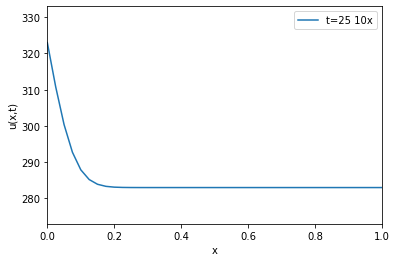

In [15]:
# I had to stop it as it was taking a long time...if you want to see the whole simulation
# have patience
import time
import os

dt = 0.00034375
t0 = time.process_time()
u, t = ode_FE(rhs, U_0, dt, T=1*60*60)
t1 = time.process_time()
print('CPU time: %.1fs' % (t1 - t0))

# Make movie

os.system('rm fig/tmp_*.png')
##import matplotlib.pyplot as plt

plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]):
    print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t=%.0f 10x' % t[i]])
    else:
        plt.legend(['t=%.0f' % t[i]])
    plt.draw()
    if plot:
        plt.savefig('fig/tmp_%04d.png' % counter)
        counter += 1

In [17]:
# To create the movie from the saved files
# I will keep only tye movie, files will be removed in the next cell
! ffmpeg -i fig/tmp_%04d.png -r 4 -vcodec libx264  fig/movie.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/usr/local/anaconda --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from 'fig/tmp_%04d.png':

If you want to check some of the used parameters, change Δt. You will find that the problem is that Δt is too large, making the solution unstable. It turns out that the Forward Euler time integration method puts a restriction on the size of Δt. For the heat equation and the way we have discretized it, this restriction can be shown to be (stability criterion)

$$
\Delta t < \frac{\Delta x^2}{2 \beta}
$$


 I would recommend you that you really take a class on partial differential equations and numerical methods on PDEs. You will learn for example that there are other methods where the stability criterion helps to select larger Δt (implicit methods such as the Backward Euler scheme, adaptative methods), etc. A good description is included in [here](http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/index.html). We have used this references for most of this notebook. But if you want to enter into the field, I do recommend you to read and use the package [Fenics](https://fenicsproject.org/pub/tutorial/html/ftut1.html).